In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/100_days_of_Deep_Learning/ML-PROJECTS/23-Ecommerce-Fraud-Transaction-Detection

/content/drive/MyDrive/100_days_of_Deep_Learning/ML-PROJECTS/23-Ecommerce-Fraud-Transaction-Detection


In [ ]:
!ls

1.ipynb  Transaction_Data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Set the seed for reproducibility
seed_value = 42

# Setting the seed for numpy
np.random.seed(seed_value)

# Setting the seed for sklearn (train_test_split uses random splitting)
import random
random.seed(seed_value)


In [ ]:
# loading the dataset to a Pandas DataFrame
Transaction_Data = pd.read_csv('Transaction_Data.csv')

In [ ]:
# print first 5 rows of the dataset
Transaction_Data.head()

Transaction ID                           Customer ID  \
0  c12e07a0-8a06-4c0d-b5cc-04f3af688570  8ca9f102-02a4-4207-ab63-484e83a1bdf0   
1  7d187603-7961-4fce-9827-9698e2b6a201  4d158416-caae-4b09-bd5b-15235deb9129   
2  f2c14f9d-92df-4aaf-8931-ceaf4e63ed72  ccae47b8-75c7-4f5a-aa9e-957deced2137   
3  e9949bfa-194d-486b-84da-9565fca9e5ce  b04960c0-aeee-4907-b1cd-4819016adcef   
4  7362837c-7538-434e-8731-0df713f5f26d  de9d6351-b3a7-4bc7-9a55-8f013eb66928   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               42.32  2024-03-24 23:42:43         PayPal      electronics   
1              301.34  2024-01-22 00:53:31    credit card      electronics   
2              340.32  2024-01-22 08:06:03     debit card     toys & games   
3               95.77  2024-01-16 20:34:53    credit card      electronics   
4               77.45  2024-01-16 15:47:23    credit card         clothing   

   Quantity  Customer Age    Customer Location Device Used       IP Address  \
0         1            40      East Jameshaven     desktop    110.87.246.85   
1         3            35             Kingstad      tablet    14.73.104.153   
2         5            29           North Ryan     desktop      67.58.94.93   
3         5            45           Kaylaville      mobile  202.122.126.216   
4         5            42  North Edwardborough     desktop     96.77.232.76   

                                    Shipping Address  \
0  5399 Rachel Stravenue Suite 718\nNorth Blakebu...   
1        5230 Stephanie Forge\nCollinsbury, PR 81853   
2                195 Cole Oval\nPort Larry, IA 58422   
3         7609 Cynthia Square\nWest Brenda, NV 23016   
4  2494 Robert Ramp Suite 313\nRobinsonport, AS 5...   

                                     Billing Address  Is Fraudulent  \
0  5399 Rachel Stravenue Suite 718\nNorth Blakebu...              0   
1        5230 Stephanie Forge\nCollinsbury, PR 81853              0   
2  4772 David Stravenue Apt. 447\nVelasquezside, ...              0   
3         7609 Cynthia Square\nWest Brenda, NV 23016              0   
4  2494 Robert Ramp Suite 313\nRobinsonport, AS 5...              0   

   Account Age Days  Transaction Hour  
0               282                23  
1               223                 0  
2               360                 8  
3               325                20  
4               116                15

In [ ]:
# print last 5 rows of the dataset
Transaction_Data.tail()

Transaction ID  \
23629  d8b7171f-bdd9-479c-b98b-396c621aebfe   
23630  0fd12cf3-c641-4499-8de1-15dc4555cb0c   
23631  649680d3-a684-44cb-95bf-9b454c3aa86d   
23632  c10dbb08-28fc-4ec1-9850-d4e98d2b9640   
23633  23e3c107-f2fc-48c2-abbc-7b809bf6f102   

                                Customer ID  Transaction Amount  \
23629  98a3d94c-dc9a-4525-b273-e6ffe54cc5a4               53.73   
23630  b3429f52-8b27-46b5-914c-4accd989edb4               47.42   
23631  066e25c9-4420-4224-bc3f-1a462708090e             1045.23   
23632  cde96e9c-f562-4b8c-8fa8-f356f474232b               34.25   
23633  d8d7a64e-8419-4421-910a-a7cf709a900b               85.03   

          Transaction Date Payment Method Product Category  Quantity  \
23629  2024-01-26 16:25:05         PayPal     toys & games         5   
23630  2024-02-25 17:03:26    credit card         clothing         4   
23631  2024-03-28 23:46:47  bank transfer  health & beauty         1   
23632  2024-02-09 11:29:18     debit card    home & garden         2   
23633  2024-01-23 02:46:52    credit card         clothing         4   

       Customer Age  Customer Location Device Used       IP Address  \
23629            32        Rebeccafurt      tablet   173.97.197.128   
23630            41        Nataliefort     desktop    133.222.22.48   
23631             9  East Shannonville      tablet  206.133.237.168   
23632            39        Lake Nicole      mobile   16.204.137.130   
23633            38           Holtport      tablet  116.188.254.162   

                                        Shipping Address  \
23629                         USNV Clayton\nFPO AE 82639   
23630  9288 Patricia Cape Apt. 527\nMelissaton, IL 38543   
23631  3015 Elizabeth Summit Suite 819\nEast Joelfort...   
23632             531 Brittany Pike\nNew Stacy, OR 87952   
23633           289 Adams Wells\nWest Joeltown, LA 69190   

                                         Billing Address  Is Fraudulent  \
23629                         USNV Clayton\nFPO AE 82639              0   
23630  9288 Patricia Cape Apt. 527\nMelissaton, IL 38543              0   
23631  3015 Elizabeth Summit Suite 819\nEast Joelfort...              0   
23632             531 Brittany Pike\nNew Stacy, OR 87952              0   
23633           289 Adams Wells\nWest Joeltown, LA 69190              0   

       Account Age Days  Transaction Hour  
23629               363                16  
23630               296                17  
23631               329                23  
23632               347                11  
23633               203                 2

In [ ]:
Transaction_Data.shape

(23634, 16)

In [ ]:
# getting some info about the data
Transaction_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [ ]:
# checking the number of missing values in each column
Transaction_Data.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [ ]:
# statistical measures about the data
Transaction_Data.describe()

Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        23634.000000  23634.000000  23634.000000   23634.000000   
mean           229.367099      3.000550     34.560210       0.051705   
std            282.046669      1.419663     10.009471       0.221436   
min             10.000000      1.000000     -2.000000       0.000000   
25%             69.070000      2.000000     28.000000       0.000000   
50%            151.415000      3.000000     35.000000       0.000000   
75%            296.127500      4.000000     41.000000       0.000000   
max           9716.500000      5.000000     73.000000       1.000000   

       Account Age Days  Transaction Hour  
count      23634.000000      23634.000000  
mean         178.660531         11.266015  
std          107.388682          6.980659  
min            1.000000          0.000000  
25%           84.000000          5.000000  
50%          178.000000         11.000000  
75%          272.000000         17.000000  
max          365.000000         23.000000

In [ ]:
Transaction_Data.describe(include='all')

Transaction ID  \
count                                  23634   
unique                                 23634   
top     23e3c107-f2fc-48c2-abbc-7b809bf6f102   
freq                                       1   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

                                 Customer ID  Transaction Amount  \
count                                  23634        23634.000000   
unique                                 23634                 NaN   
top     d8d7a64e-8419-4421-910a-a7cf709a900b                 NaN   
freq                                       1                 NaN   
mean                                     NaN          229.367099   
std                                      NaN          282.046669   
min                                      NaN           10.000000   
25%                                      NaN           69.070000   
50%                                      NaN          151.415000   
75%                                      NaN          296.127500   
max                                      NaN         9716.500000   

           Transaction Date Payment Method Product Category      Quantity  \
count                 23634          23634            23634  23634.000000   
unique                23607              4                5           NaN   
top     2024-01-06 14:38:19     debit card    home & garden           NaN   
freq                      2           5952             4786           NaN   
mean                    NaN            NaN              NaN      3.000550   
std                     NaN            NaN              NaN      1.419663   
min                     NaN            NaN              NaN      1.000000   
25%                     NaN            NaN              NaN      2.000000   
50%                     NaN            NaN              NaN      3.000000   
75%                     NaN            NaN              NaN      4.000000   
max                     NaN            NaN              NaN      5.000000   

        Customer Age Customer Location Device Used       IP Address  \
count   23634.000000             23634       23634            23634   
unique           NaN             14868           3            23634   
top              NaN     North Michael     desktop  116.188.254.162   
freq             NaN                30        7923                1   
mean       34.560210               NaN         NaN              NaN   
std        10.009471               NaN         NaN              NaN   
min        -2.000000               NaN         NaN              NaN   
25%        28.000000               NaN         NaN              NaN   
50%        35.000000               NaN         NaN              NaN   
75%        41.000000               NaN         NaN              NaN   
max        73.000000               NaN         NaN              NaN   

                                Shipping Address  \
count                                      23634   
unique                                     23634   
top     289 Adams Wells\nWest Joeltown, LA 69190   
freq                                           1   
mean                                         NaN   
std                                          NaN   
min                                          NaN   
25%                                          NaN   
50%                                          NaN   
75%                                          NaN   
max                                          NaN   

                                 Billing Address  Is Fraudulent  \
count                                      23634   23634.000000   
unique                                     23634            NaN   
top     289 Adams Wells\nWest Jo

In [ ]:
# Check for duplicate rows ..
print(f"Duplicate Rows: {Transaction_Data.duplicated().sum()}")

Duplicate Rows: 0


In [ ]:
# Unique values per column
print(Transaction_Data.nunique())

Transaction ID        23634
Customer ID           23634
Transaction Amount    18375
Transaction Date      23607
Payment Method            4
Product Category          5
Quantity                  5
Customer Age             74
Customer Location     14868
Device Used               3
IP Address            23634
Shipping Address      23634
Billing Address       23634
Is Fraudulent             2
Account Age Days        365
Transaction Hour         24
dtype: int64


### **EDA (Exploratory Data Analysis)**

In [ ]:
sns.set()

### **Univariate Analysis (categorical Features)**

In [ ]:
categorical_cols = ['Payment Method', 'Product Category', 'Device Used']
for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {Transaction_Data[col].nunique()}")
    print("Value counts:")
    print(Transaction_Data[col].value_counts())
    print("-" * 40)

Column: Payment Method
Number of unique values: 4
Value counts:
Payment Method
debit card       5952
credit card      5923
PayPal           5899
bank transfer    5860
Name: count, dtype: int64
----------------------------------------
Column: Product Category
Number of unique values: 5
Value counts:
Product Category
home & garden      4786
electronics        4748
toys & games       4730
clothing           4699
health & beauty    4671
Name: count, dtype: int64
----------------------------------------
Column: Device Used
Number of unique values: 3
Value counts:
Device Used
desktop    7923
mobile     7881
tablet     7830
Name: count, dtype: int64
----------------------------------------


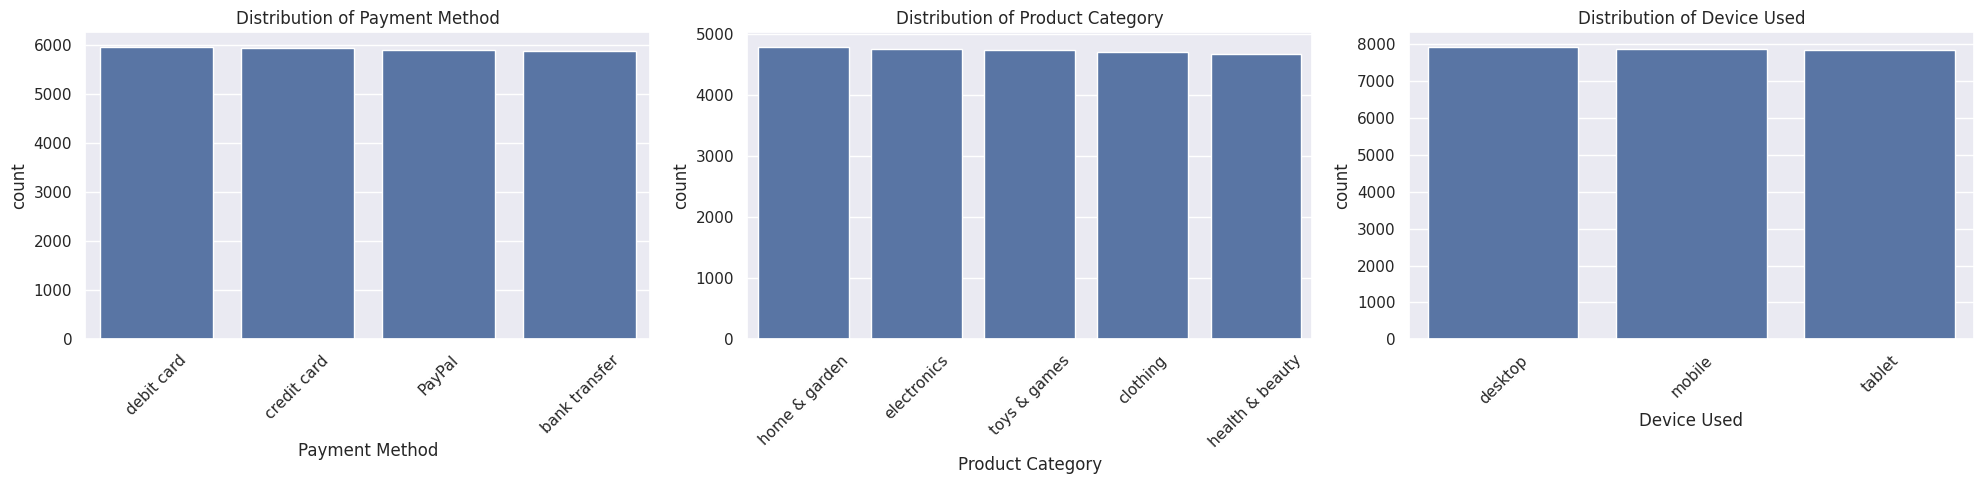

In [ ]:
# Value Counts + Bar Plots

categorical_cols = ['Payment Method', 'Product Category', 'Device Used']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=Transaction_Data, x=col, order=Transaction_Data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45) # rotate x axis label by 45 degree

plt.tight_layout()
plt.show()


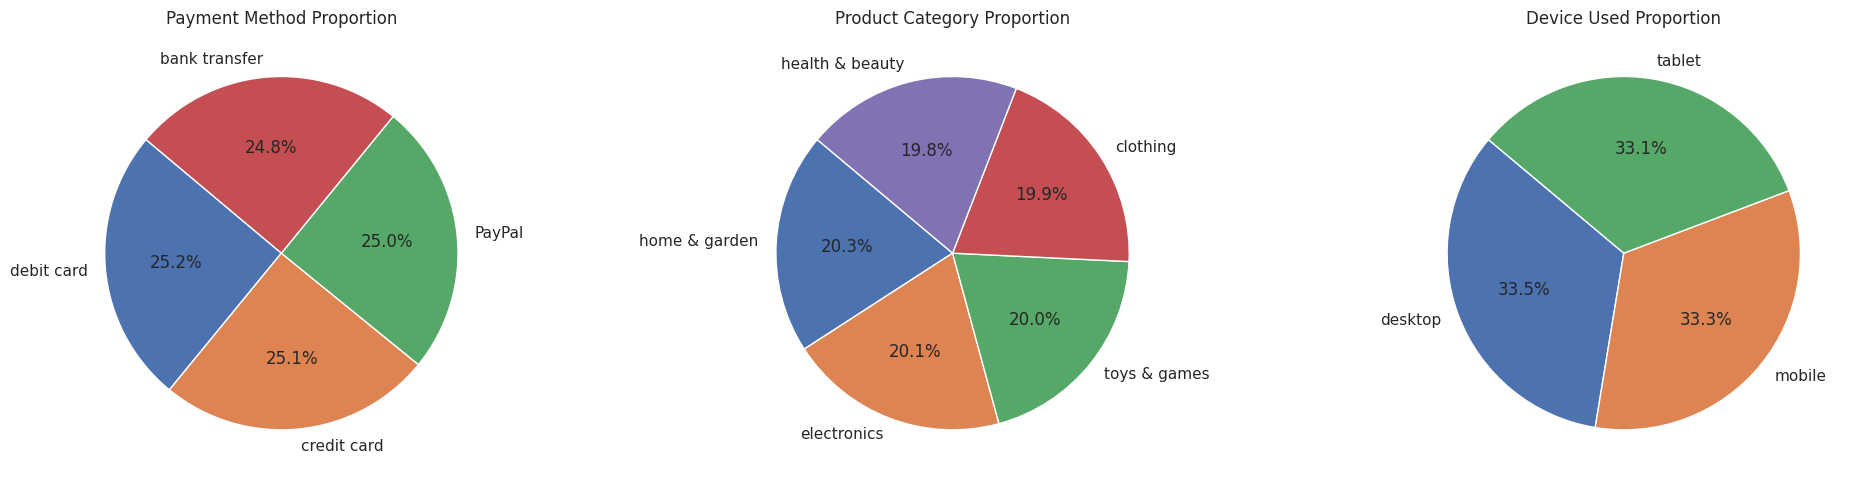

In [ ]:
# 2. Pie Charts for Proportion Distribution

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(categorical_cols):
    values = Transaction_Data[col].value_counts()
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{col} Proportion')

plt.tight_layout()
plt.show()



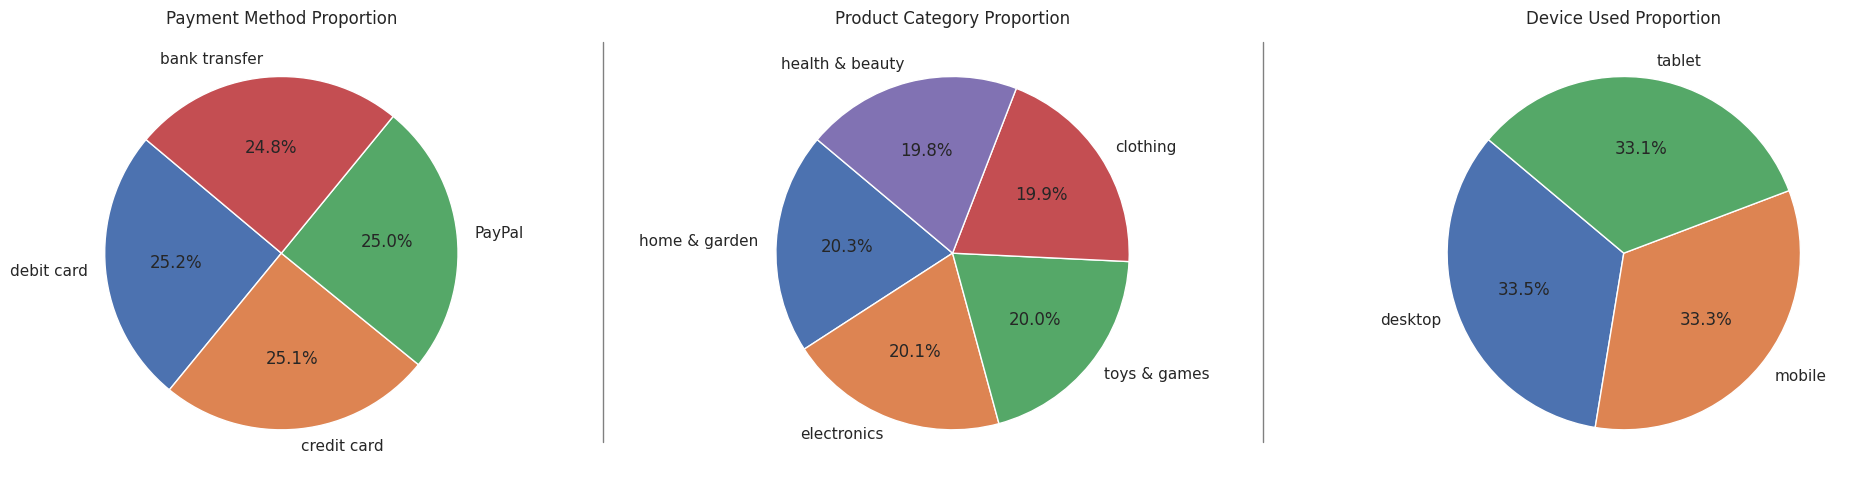

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(categorical_cols):
    values = Transaction_Data[col].value_counts()
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{col} Proportion')

# Get the figure height for placing the line from top to bottom
for xpos in [0.33, 0.66]:  # adjust these as needed based on spacing
    fig.add_artist(plt.Line2D([xpos, xpos], [0.1, 0.9], color='gray', linewidth=1))

plt.tight_layout()
plt.show()


**When dealing with a categorical column like Customer Location that has a large number of unique values (14,868),**
**standard bar or pie charts are not effective, as they become cluttered and unreadable.**

**Instead, here are several more suitable EDA techniques for high-cardinality categorical variables:**

### **1. Top-N Bar Plot (Most Frequent Categories)**

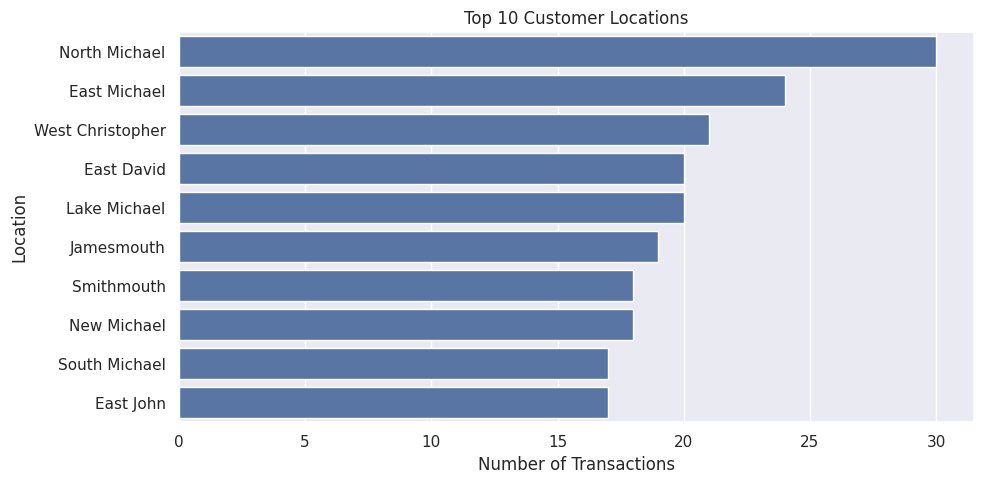

In [ ]:
top_n = 10
top_locations = Transaction_Data['Customer Location'].value_counts().nlargest(top_n)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title(f'Top {top_n} Customer Locations')
plt.xlabel('Number of Transactions')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


In [ ]:
# Frequency Table / Summary Stats ..

location_freq = Transaction_Data['Customer Location'].value_counts().reset_index()
location_freq.columns = ['Location', 'Count']
location_freq['Proportion'] = location_freq['Count'] / location_freq['Count'].sum()
location_freq['Cumulative %'] = location_freq['Proportion'].cumsum() * 100


'''
1st line
Transaction_Data['Customer Location']: accesses the column "Customer Location".
.value_counts(): counts how many times each unique location appears.
.reset_index(): converts the resulting series into a DataFrame with a default integer index.

2nd line
'Location': name of the customer location.
'Count': number of transactions/customers from that location.

3rd line
Calculates the proportion (percentage) of each location relative to the total number of transactions.

4th line
Computes the cumulative percentage of transactions. This is useful for parito analysis
ex : let location_freq['Proportion'] = [0.40, 0.30, 0.20, 0.10]
[0.40, 0.30, 0.20, 0.10].cumsum() → [0.40, 0.70, 0.90, 1.00]
[0.40, 0.70, 0.90, 1.00] → [40.0, 70.0, 90.0, 100.0]

'''

'\n1st line\nTransaction_Data[\'Customer Location\']: accesses the column "Customer Location".\n.value_counts(): counts how many times each unique location appears.\n.reset_index(): converts the resulting series into a DataFrame with a default integer index.\n\n2nd line\n\'Location\': name of the customer location.\n\'Count\': number of transactions/customers from that location.\n\n3rd line\nCalculates the proportion (percentage) of each location relative to the total number of transactions.\n\n4th line\nComputes the cumulative percentage of transactions. This is useful for parito analysis\nex : let location_freq[\'Proportion\'] = [0.40, 0.30, 0.20, 0.10]\n[0.40, 0.30, 0.20, 0.10].cumsum() → [0.40, 0.70, 0.90, 1.00]\n[0.40, 0.70, 0.90, 1.00] → [40.0, 70.0, 90.0, 100.0]\n\n'

In [ ]:
print(location_freq.head(10))
print(location_freq.shape)

           Location  Count  Proportion  Cumulative %
0     North Michael     30    0.001269      0.126936
1      East Michael     24    0.001015      0.228484
2  West Christopher     21    0.000889      0.317339
3        East David     20    0.000846      0.401963
4      Lake Michael     20    0.000846      0.486587
5        Jamesmouth     19    0.000804      0.566980
6        Smithmouth     18    0.000762      0.643141
7       New Michael     18    0.000762      0.719303
8     South Michael     17    0.000719      0.791233
9         East John     17    0.000719      0.863163
(14868, 4)


In [ ]:
print(location_freq.tail(10))

                  Location  Count  Proportion  Cumulative %
14858           Grahamside      1    0.000042     99.961919
14859       Danielschester      1    0.000042     99.966150
14860  North Christinetown      1    0.000042     99.970382
14861    West Jenniferside      1    0.000042     99.974613
14862         Jeremiahfurt      1    0.000042     99.978844
14863    North Walterhaven      1    0.000042     99.983075
14864            West Jeff      1    0.000042     99.987306
14865            New Karen      1    0.000042     99.991538
14866         Phillipville      1    0.000042     99.995769
14867        Lake Lindaton      1    0.000042    100.000000


**Pareto Chart (Bar Plot + Cumulative Line)**

<ipython-input-26-4cc1b687efe7>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(location_freq_sorted['Location'], rotation=45, ha='right')


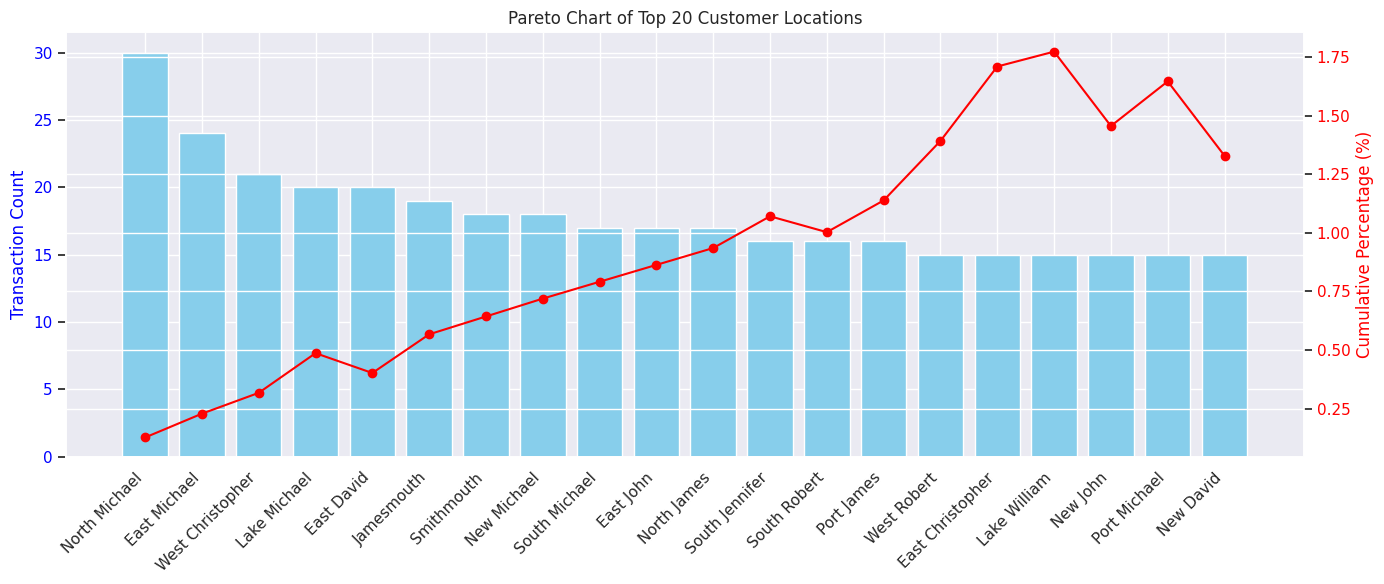

In [ ]:
# since We have more than 14000 unique location , we do parito analysis for top 20 location only ..

# Keep only top 20 for visualization
top_n = 20
location_freq_sorted = location_freq.sort_values('Count', ascending=False).head(top_n)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for Counts
ax1.bar(location_freq_sorted['Location'], location_freq_sorted['Count'], color='skyblue')
ax1.set_ylabel('Transaction Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(location_freq_sorted['Location'], rotation=45, ha='right')

# Create second y-axis for cumulative %
ax2 = ax1.twinx()
ax2.plot(location_freq_sorted['Location'], location_freq_sorted['Cumulative %'], color='red', marker='o')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title(f'Pareto Chart of Top {top_n} Customer Locations')
plt.tight_layout()
plt.show()





### **Line Plot of Cumulative % (if many locations)**

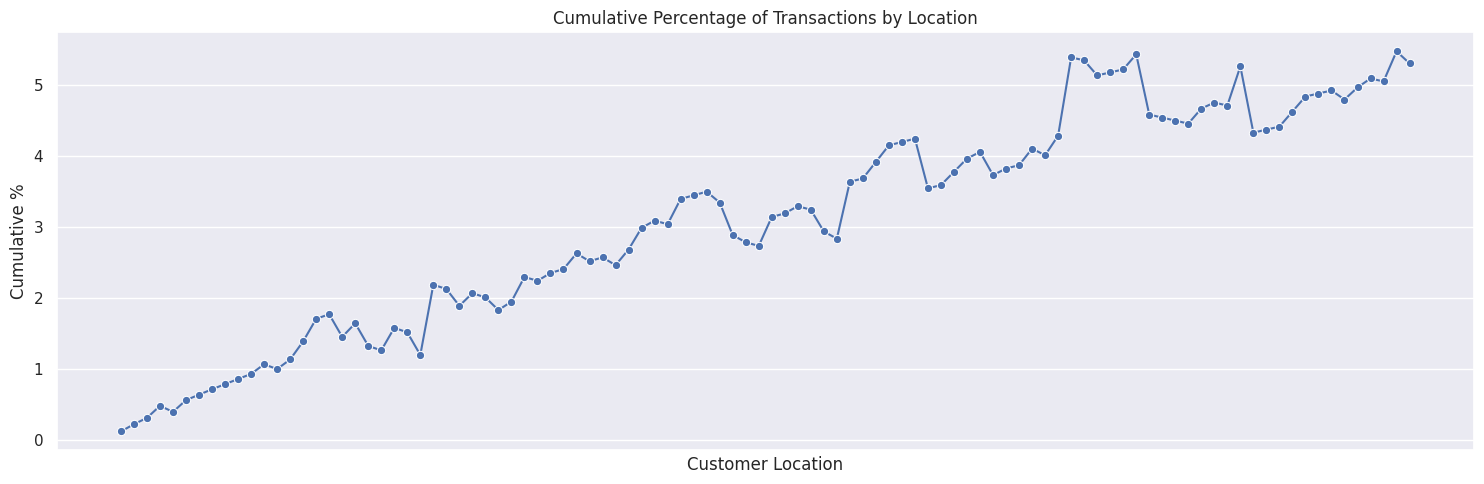

In [ ]:
# we have many locations and want to track how quickly the cumulative share adds up:

location_freq_sorted = location_freq.sort_values('Count', ascending=False).head(100)  # for only top 100 locations

# Plot without x-axis labels
plt.figure(figsize=(15, 5))
sns.lineplot(data=location_freq_sorted, x='Location', y='Cumulative %', marker='o')
plt.xticks([], [])  # Remove x-axis ticks and labels
plt.title('Cumulative Percentage of Transactions by Location')
plt.ylabel('Cumulative %')
plt.xlabel('Customer Location')
plt.tight_layout()
plt.show()


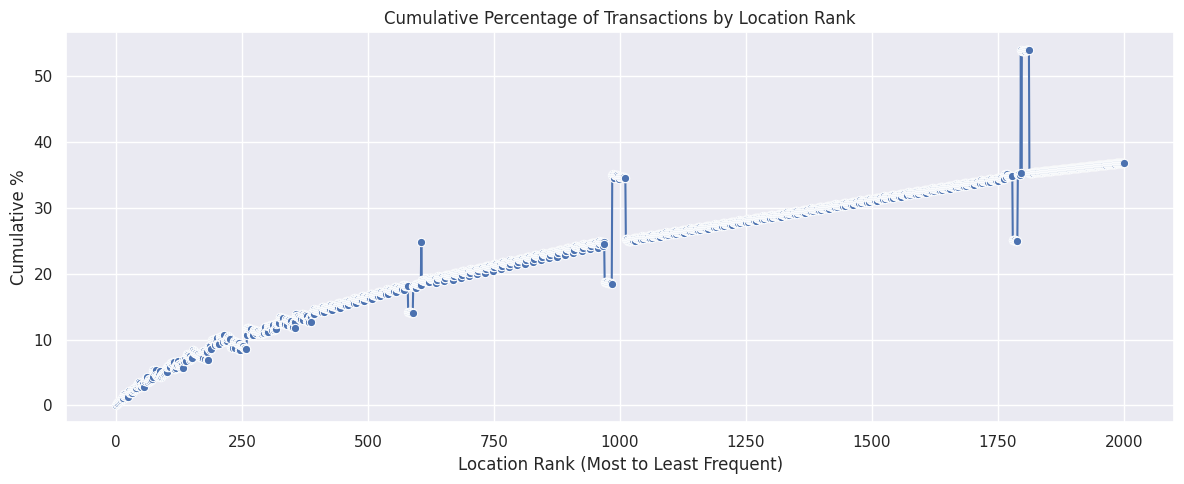

In [ ]:
# Sort and reset index to use rank instead of location names to check for larger values
location_freq_sorted = location_freq.sort_values('Count', ascending=False).reset_index(drop=True)
location_freq_sorted['Rank'] = location_freq_sorted.index + 1  # Add rank column starting from 1

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=location_freq_sorted.head(2000), x='Rank', y='Cumulative %', marker='o')
plt.title('Cumulative Percentage of Transactions by Location Rank')
plt.ylabel('Cumulative %')
plt.xlabel('Location Rank (Most to Least Frequent)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 2000 values locations almost contribute to 40 to 50 % of transactions ...

### **Pie Chart of Top N Locations (optional)**

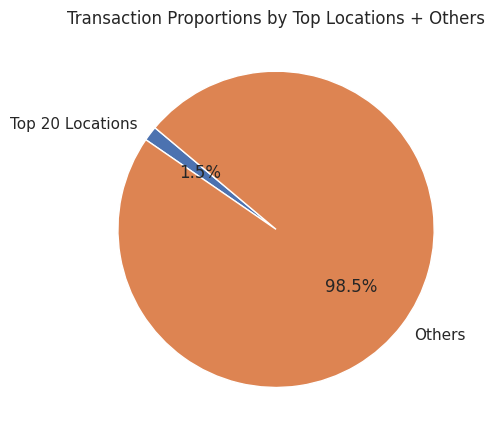

In [ ]:
import matplotlib.pyplot as plt

# Top 20 locations
top_n = 20

# Calculate "Others" as the sum of the remaining locations
others = pd.DataFrame({
    'Location': ['Others'],
    'Count': [location_freq_sorted['Count'][top_n:].sum()],
    'Proportion': [location_freq_sorted['Proportion'][top_n:].sum()]
})

# Select the top N locations and sum their proportions
top_locations_proportion = location_freq_sorted.head(top_n)['Proportion'].sum()

# Combine the top locations' summed proportion and "Others"
top_plus_others = pd.DataFrame({
    'Location': ['Top 20 Locations', 'Others'],
    'Proportion': [top_locations_proportion, others['Proportion'].values[0]]
})

# Create a pie chart
plt.figure(figsize=(5,5))

# Pie chart with correct labels and summed proportions
plt.pie(top_plus_others['Proportion'], labels=top_plus_others['Location'], autopct='%1.1f%%', startangle=140)

plt.title('Transaction Proportions by Top Locations + Others')
plt.tight_layout()
plt.show()


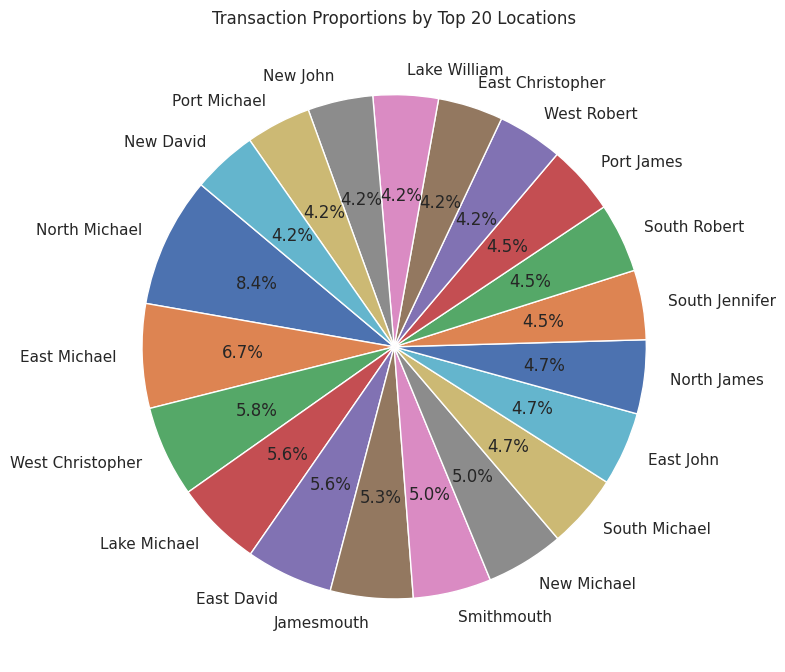

In [ ]:
import matplotlib.pyplot as plt

# Take the top 10 locations
top_n = 20
top_locations = location_freq_sorted.head(top_n)

# Create a pie chart for these top 10 locations
plt.figure(figsize=(8,8))
plt.pie(top_locations['Proportion'], labels=top_locations['Location'], autopct='%1.1f%%', startangle=140)
plt.title(f'Transaction Proportions by Top {top_n} Locations')
plt.tight_layout()
plt.show()


### **Group-Based Aggregation**

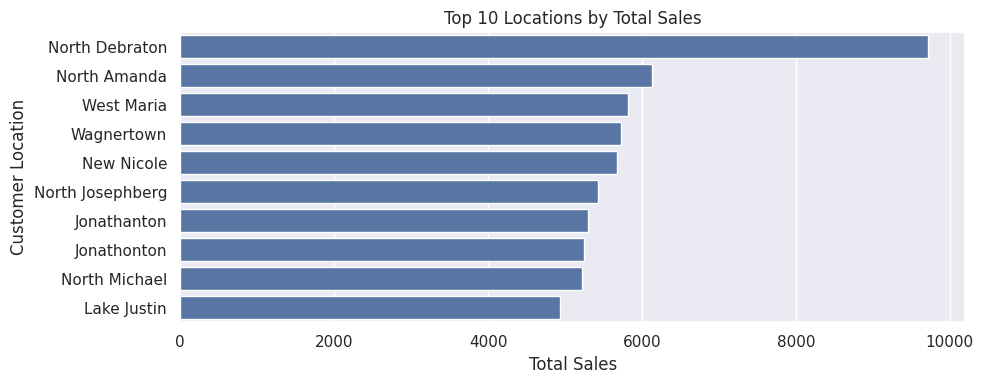

In [ ]:
# Total sales by Location ..
# selects the top 10 locations with the highest total sales..

location_sales = Transaction_Data.groupby('Customer Location')['Transaction Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=location_sales.values, y=location_sales.index)
plt.title('Top 10 Locations by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Location')
plt.tight_layout()
plt.show()

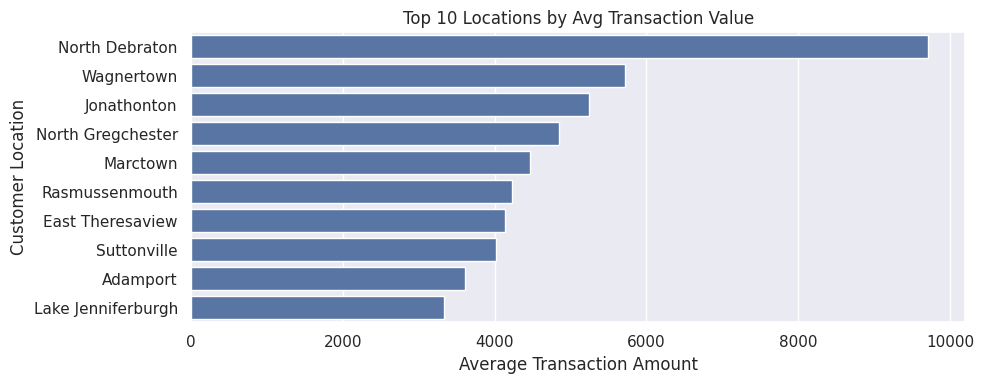

In [ ]:
# top 10 locations with the highest average transaction amounts..

avg_txn_value = Transaction_Data.groupby('Customer Location')['Transaction Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=avg_txn_value.values, y=avg_txn_value.index)
plt.title('Top 10 Locations by Avg Transaction Value')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Customer Location')
plt.tight_layout()
plt.show()


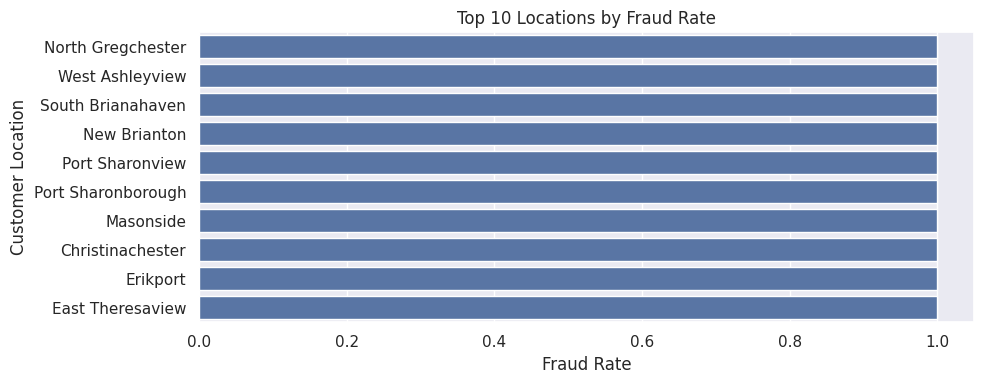

In [ ]:
# Top 10 locations by Fraud Rate ..
fraud_by_location = Transaction_Data.groupby('Customer Location')['Is Fraudulent'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=fraud_by_location.values, y=fraud_by_location.index)
plt.title('Top 10 Locations by Fraud Rate')
plt.xlabel('Fraud Rate')
plt.ylabel('Customer Location')
plt.tight_layout()
plt.show()


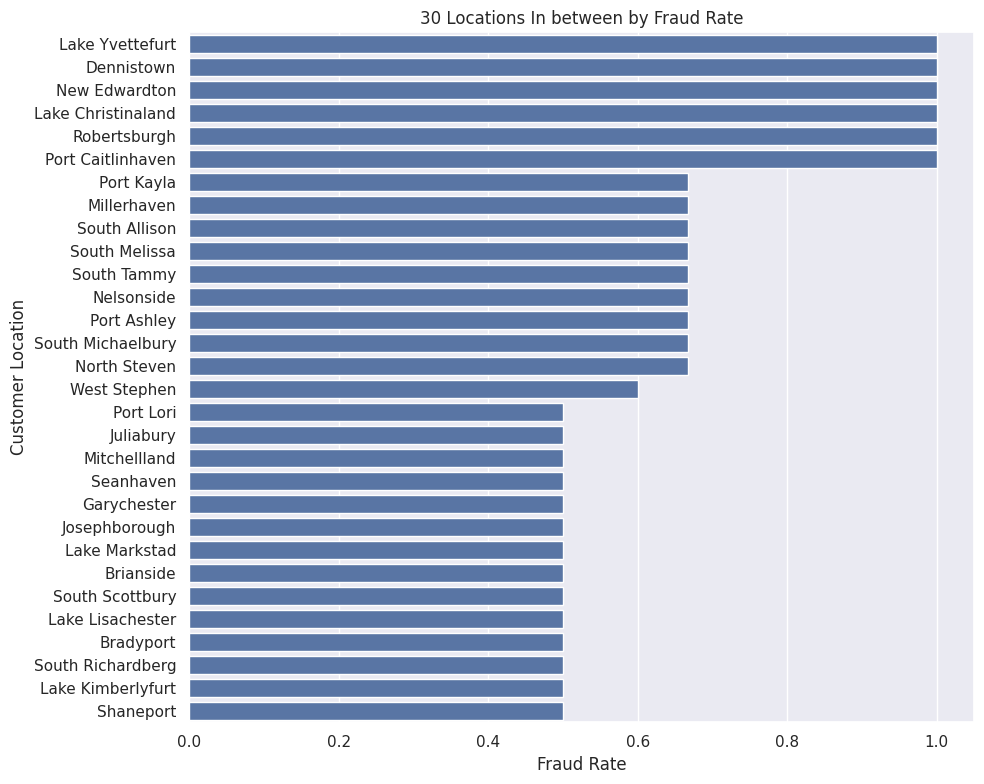

In [ ]:
# this is the range where rate of fraud starting change ..
fraud_by_location = Transaction_Data.groupby('Customer Location')['Is Fraudulent'].mean().sort_values(ascending=False)[590:620]

plt.figure(figsize=(10, 8))
sns.barplot(x=fraud_by_location.values, y=fraud_by_location.index)
plt.title('30 Locations In between by Fraud Rate')
plt.xlabel('Fraud Rate')
plt.ylabel('Customer Location')
plt.tight_layout()
plt.show()


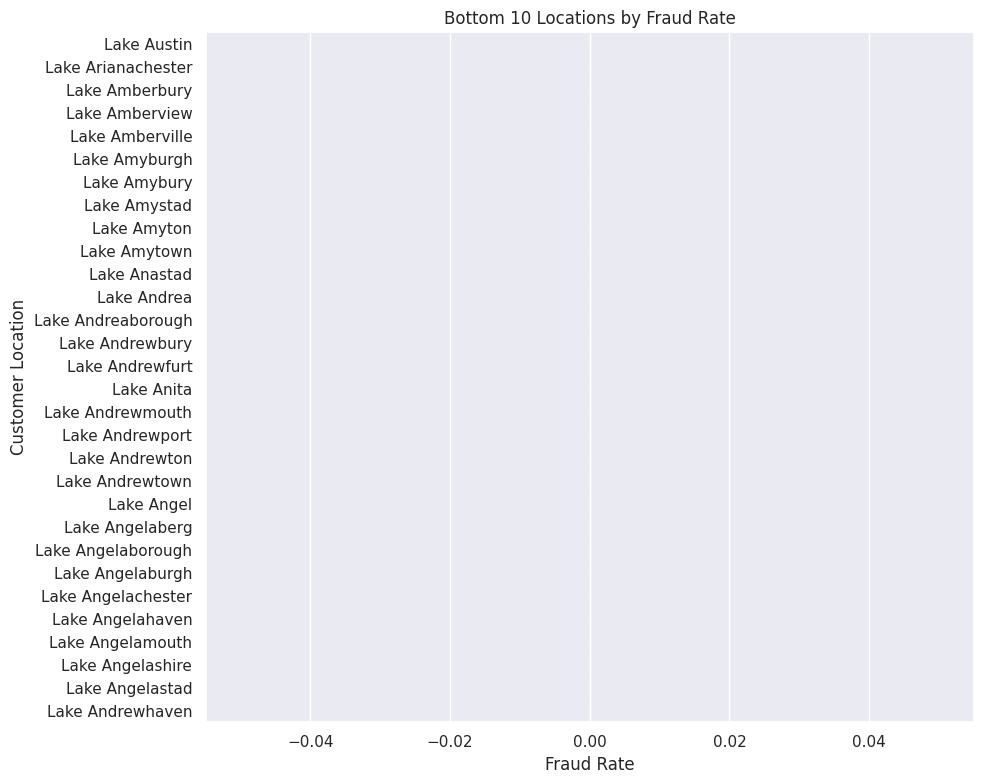

In [ ]:
least_fraud_by_location = Transaction_Data.groupby('Customer Location')['Is Fraudulent'].mean().sort_values(ascending=False).tail(30)

plt.figure(figsize=(10, 8))
sns.barplot(x=least_fraud_by_location.values, y=least_fraud_by_location.index)
plt.title('Bottom 10 Locations by Fraud Rate')
plt.xlabel('Fraud Rate')
plt.ylabel('Customer Location')
plt.tight_layout()
plt.show()


In [ ]:
'''
pd.crosstab() :
Creates a cross-tabulation (contingency table) that shows the relationship between two categorical variables.
In this case, it calculates the count of each device type used for each customer location.
'''


'\npd.crosstab() :\nCreates a cross-tabulation (contingency table) that shows the relationship between two categorical variables.\nIn this case, it calculates the count of each device type used for each customer location.\n'

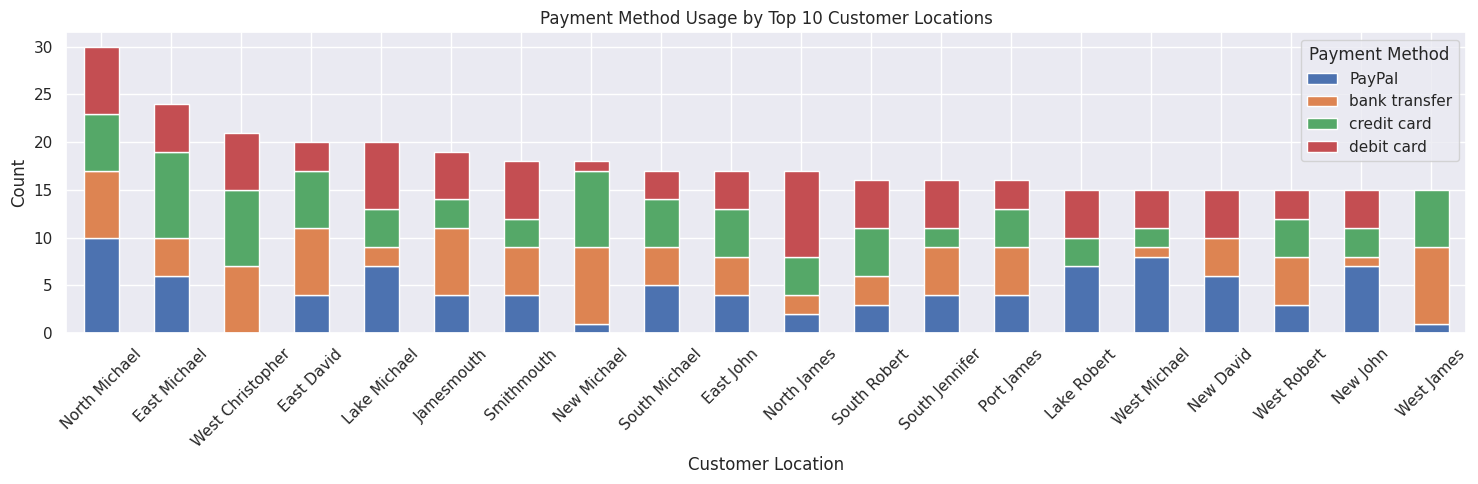

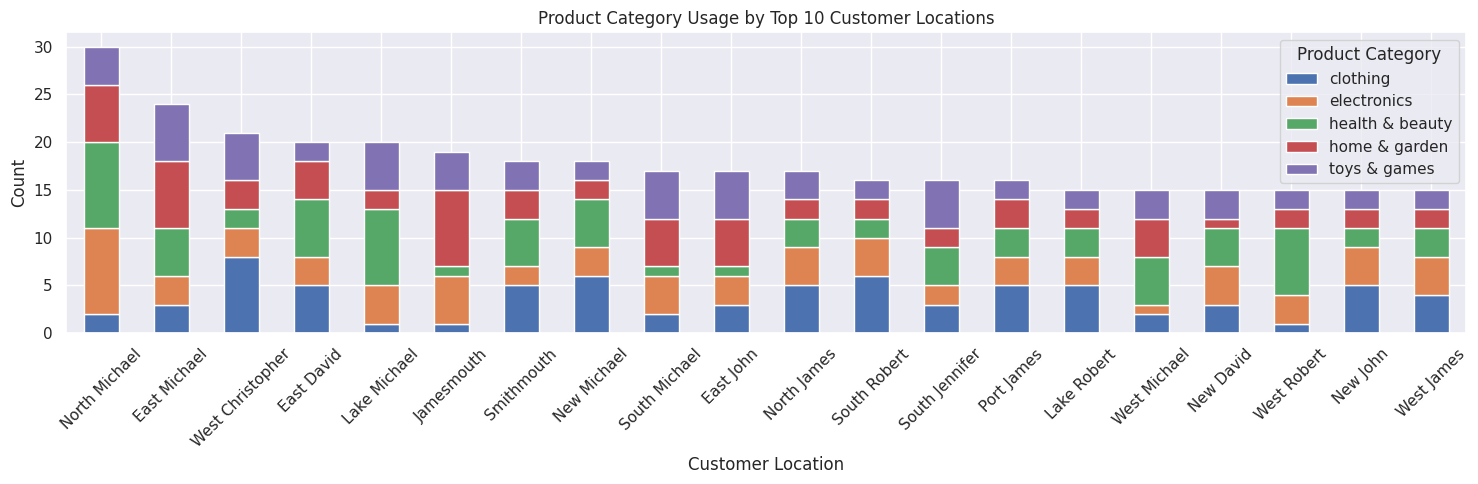

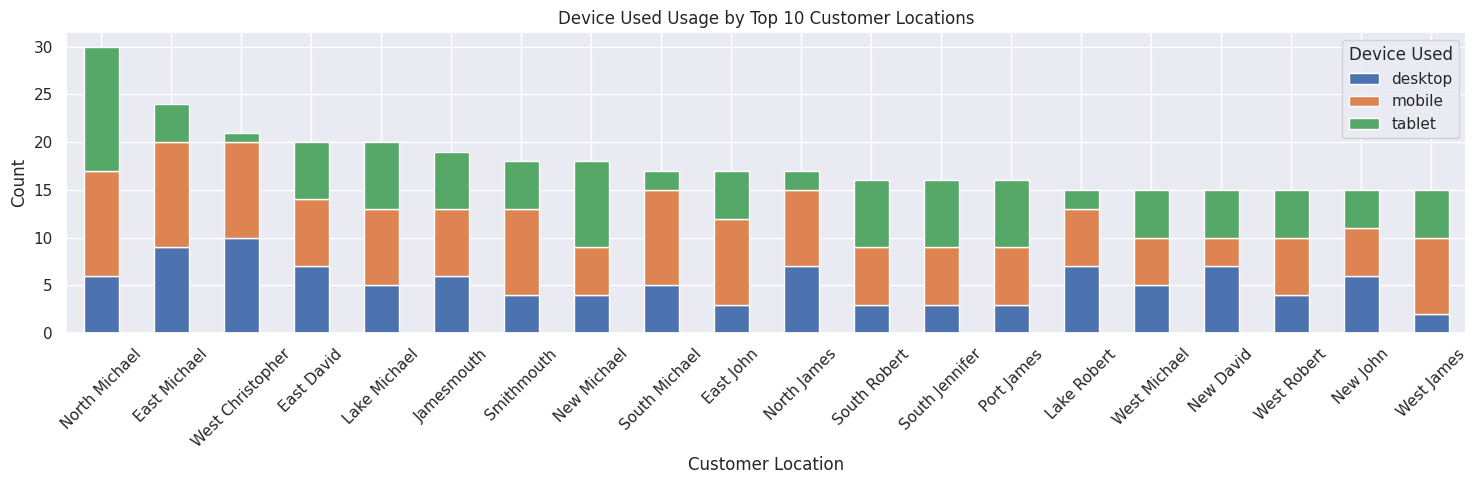

In [ ]:
# For top 20 location distribution of each categorical_cols values ..

categorical_cols = ['Payment Method', 'Product Category', 'Device Used']

for col in categorical_cols:
    # Create the crosstab
    crosstab = pd.crosstab(Transaction_Data['Customer Location'], Transaction_Data[col])

    # Focus on top 10 locations
    top_10_locations = Transaction_Data['Customer Location'].value_counts().nlargest(20).index
    crosstab_top = crosstab.loc[top_10_locations]

    # Plotting the stacked bar chart
    crosstab_top.plot(kind='bar', stacked=True, figsize=(15, 5))
    plt.title(f'{col} Usage by Top 10 Customer Locations')
    plt.ylabel('Count')
    plt.xlabel('Customer Location')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### **Univariate analysis (Numerical Features)**

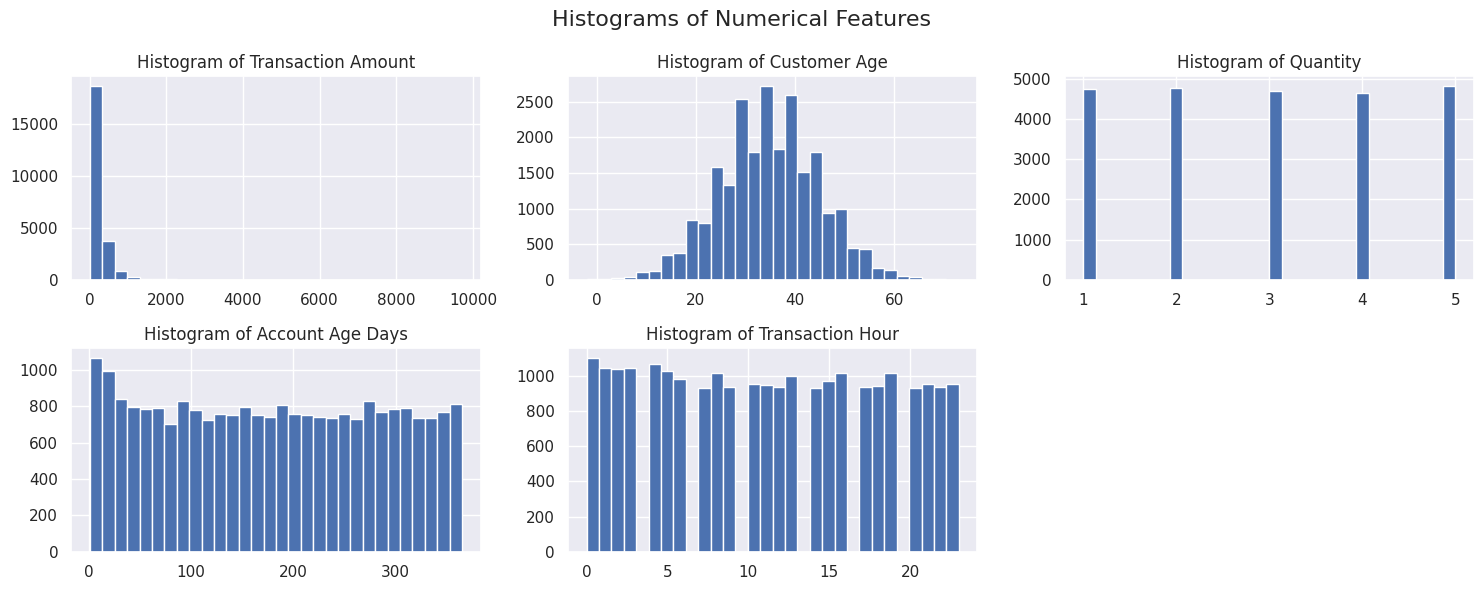

In [ ]:
# Here for numerical features we directly use pandas hist method

numerical_cols = ['Transaction Amount', 'Customer Age', 'Quantity', 'Account Age Days', 'Transaction Hour']

# Define grid layout
num_rows = 2
num_cols = 3

# Define a fixed size per subplot
subplot_width = 5  # Fixed width per subplot
subplot_height = 3  # Fixed height per subplot

# Calculate figsize dynamically
fig_width = subplot_width * num_cols
fig_height = subplot_height * num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))  # Adjust figsize dynamically

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    Transaction_Data[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


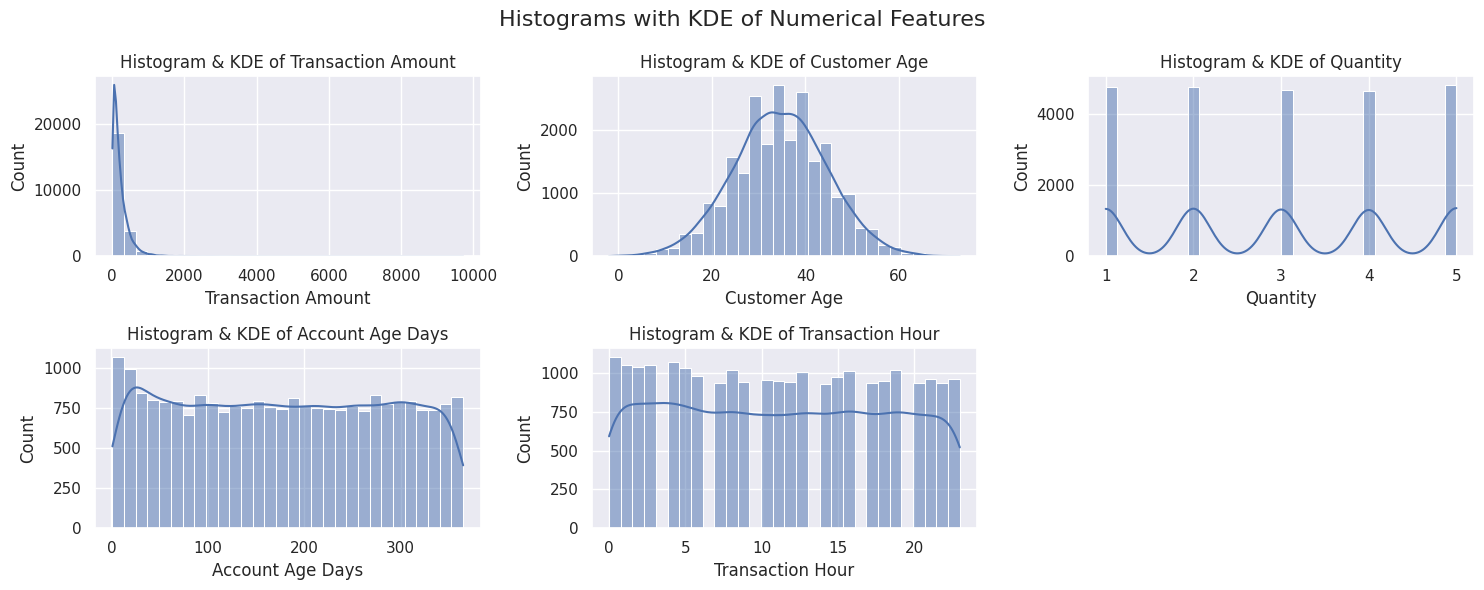

In [ ]:
# we can do the same with sns.histplot, but here we get kde = true which is not available in above method ..

numerical_cols = ['Transaction Amount', 'Customer Age', 'Quantity', 'Account Age Days', 'Transaction Hour']

# Define grid layout
num_rows = 2
num_cols = 3

# Define a fixed size per subplot
subplot_width = 5  # Fixed width per subplot
subplot_height = 3  # Fixed height per subplot

# Calculate figsize dynamically
fig_width = subplot_width * num_cols
fig_height = subplot_height * num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(Transaction_Data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram & KDE of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Histograms with KDE of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


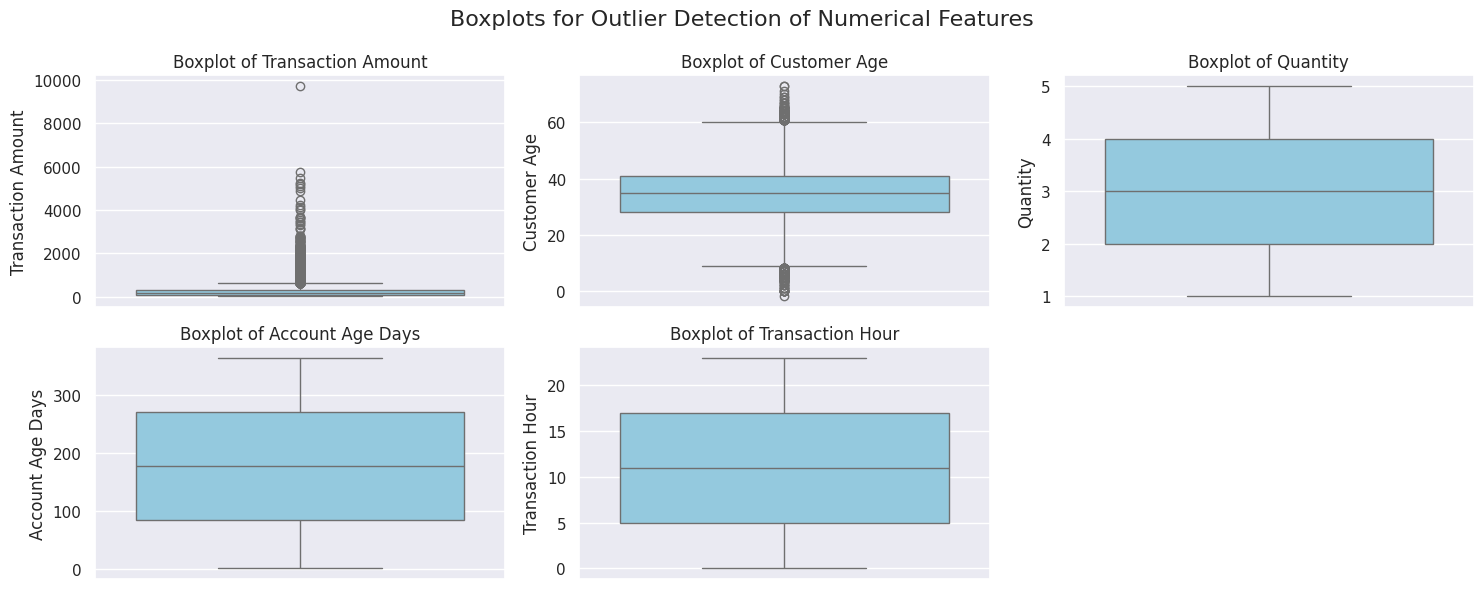

In [ ]:
# Box plot without count of outliers

numerical_cols = ['Transaction Amount', 'Customer Age', 'Quantity', 'Account Age Days', 'Transaction Hour']

# Grid configuration
num_rows = 2
num_cols = 3
subplot_width = 5
subplot_height = 3

fig_width = subplot_width * num_cols
fig_height = subplot_height * num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=Transaction_Data[col], ax=axes[i],color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')

# Hide unused subplot (since we only have 5 columns)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Boxplots for Outlier Detection of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


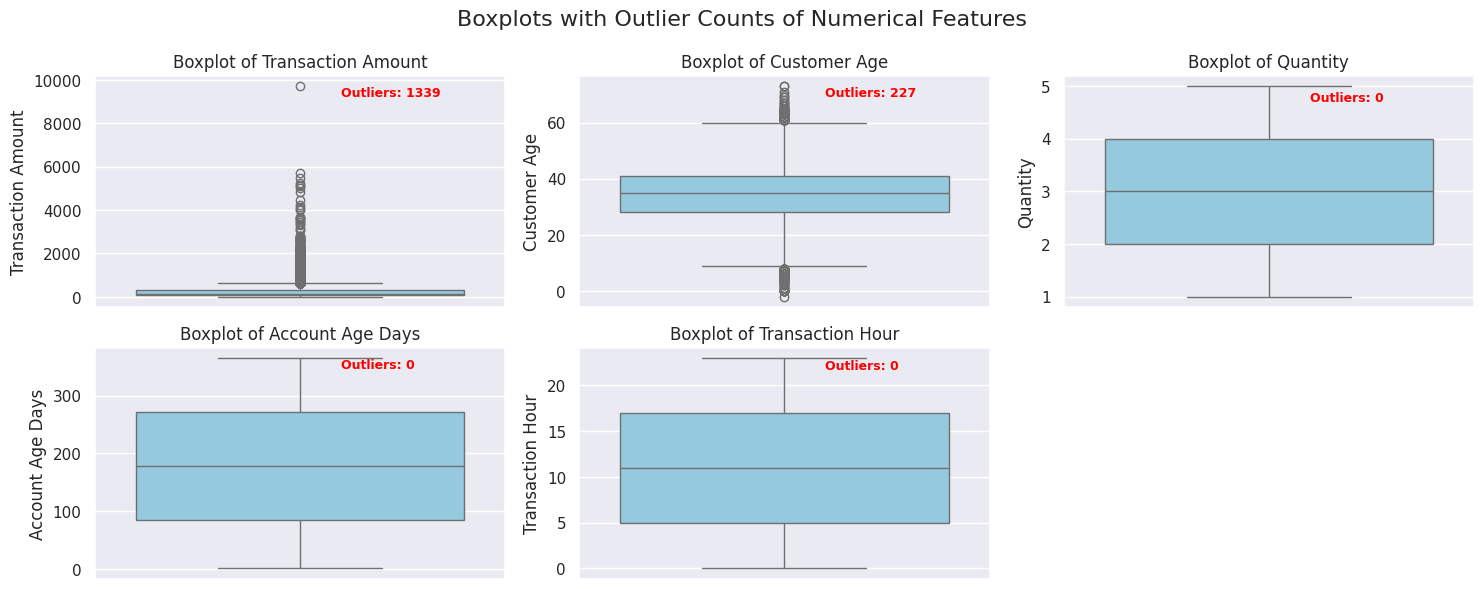

In [ ]:
# Box Plot with Outlier Detection (in grid layout) ..

numerical_cols = ['Transaction Amount', 'Customer Age', 'Quantity', 'Account Age Days', 'Transaction Hour']

# Define grid layout
num_rows = 2
num_cols = 3

# Define fixed size per subplot
subplot_width = 5
subplot_height = 3

# Calculate figsize
fig_width = subplot_width * num_cols
fig_height = subplot_height * num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    data = Transaction_Data[col]

    # Calculate IQR and outlier count
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((data < lower_bound) | (data > upper_bound)).sum()

    # Plot boxplot
    sns.boxplot(y=data, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')

    # Annotate outlier count slightly below the top
    y_max = data.max()
    axes[i].text(
    0.1, (y_max - 0.1),  # X, Y coordinates (data coordinates)
    f'Outliers: {outlier_count}', # Text string to display
    ha='left',                    # Horizontal alignment of the text relative to (x, y)
    va='top',                     # Vertical alignment of the text relative to (x, y)
    color='red',                  # Text color
    fontsize=9,                   # Font size
    weight='bold'                 # Font weight (bold)
)

# Hide unused subplot (only needed if fewer than 6 plots)
for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)

# Move the super title up to avoid overlapping
plt.subplots_adjust(top=0.85)
fig.suptitle('Boxplots with Outlier Counts of Numerical Features', fontsize=16)

plt.tight_layout()
plt.show()


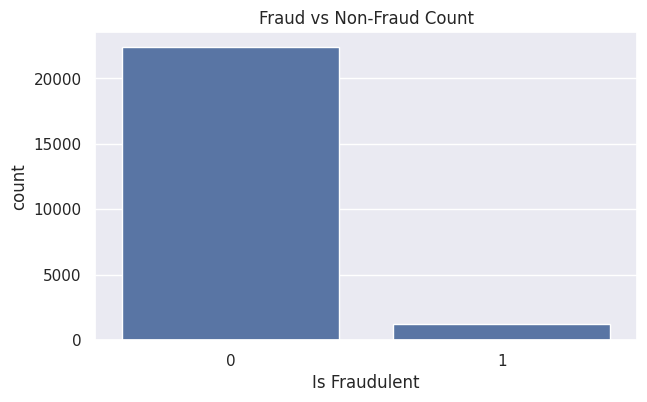

Fraud Rate: 5.17%


In [ ]:
# Target variable analysis ..

plt.figure(figsize=(7,4))
sns.countplot(data=Transaction_Data, x='Is Fraudulent')
plt.title('Fraud vs Non-Fraud Count')
plt.show()

fraud_rate = Transaction_Data['Is Fraudulent'].mean()
print(f"Fraud Rate: {fraud_rate:.2%}")


## **Bivariate Analysis**

### **(Categorical Vs Target)**

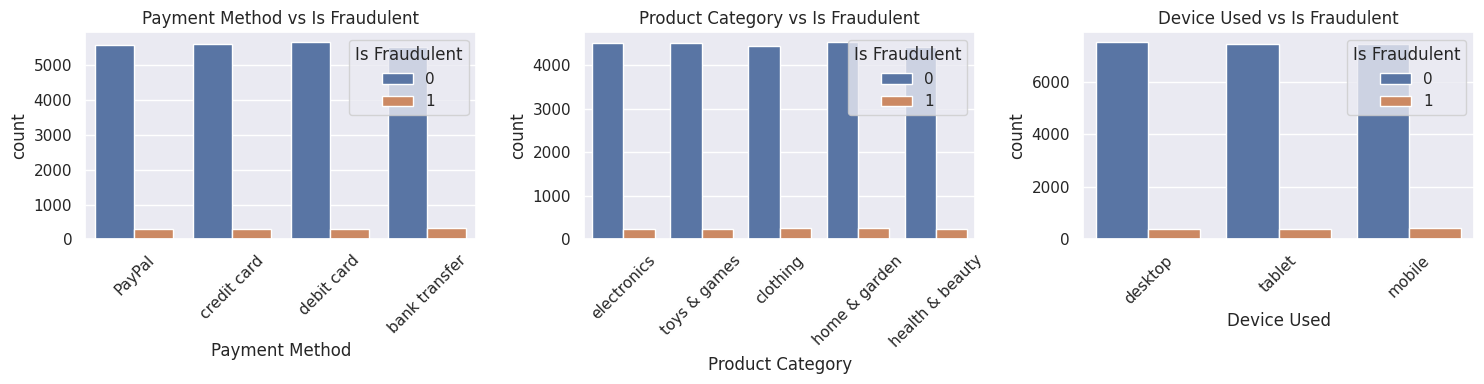

In [ ]:
categorical_cols = ['Payment Method', 'Product Category', 'Device Used']

# Define grid layout
num_rows = 1
num_cols = 3

# Define a fixed size per subplot
subplot_width = 5  # Fixed width per subplot
subplot_height = 4  # Fixed height per subplot

# Calculate figsize dynamically
fig_width = subplot_width * num_cols
fig_height = subplot_height * num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))  # Adjust figsize dynamically

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through categories and create countplots
for i, category in enumerate(categorical_cols):
    sns.countplot(x=category, hue='Is Fraudulent', data=Transaction_Data, ax=axes[i])
    axes[i].set_title(f"{category} vs Is Fraudulent")
    axes[i].tick_params(axis='x', rotation=45)


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



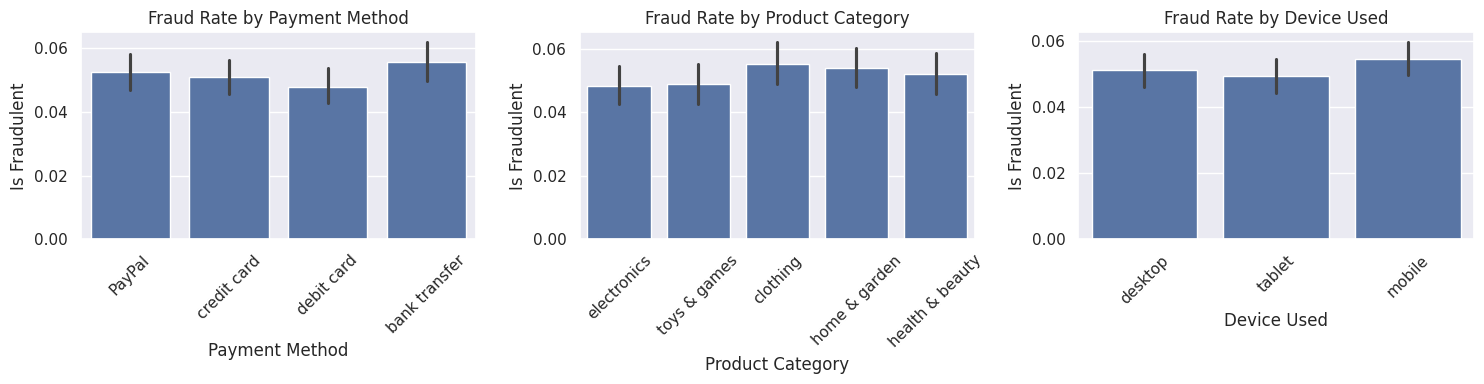

In [ ]:
# Rate of fraud transaction by each category ..

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through categories and create barplots (fraud rate)
for i, col in enumerate(categorical_cols):
    sns.barplot(data=Transaction_Data, x=col, y='Is Fraudulent', ax=axes[i])
    axes[i].set_title(f"Fraud Rate by {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

## **Bivariate Analysis (Numerical Vs Target)**

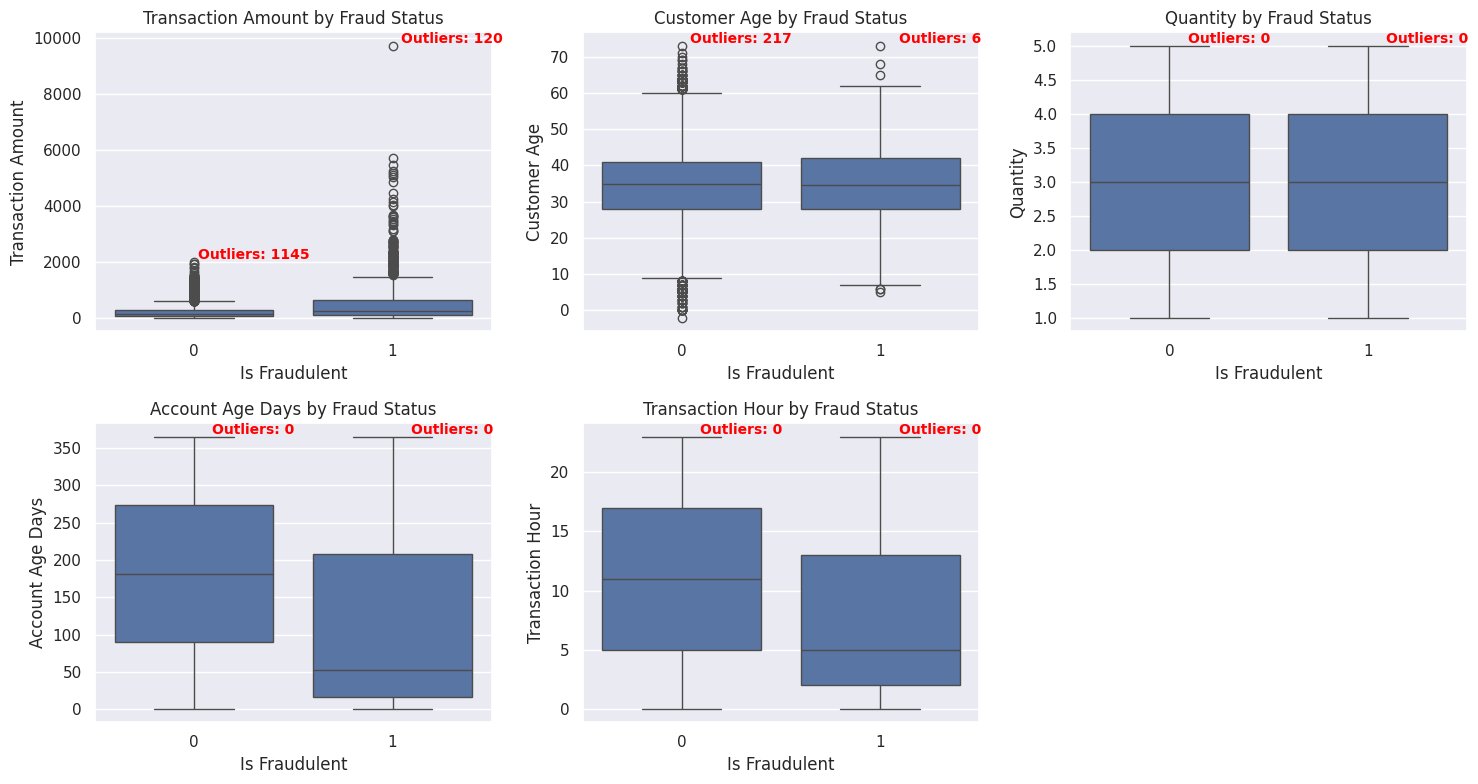

In [ ]:
import math


# Number of rows and cols
num_cols = 3
num_rows = math.ceil(len(numerical_cols) / num_cols)

# Subplot size
subplot_width = 5
subplot_height = 4
fig_width = subplot_width * num_cols
fig_height = subplot_height * num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
axes = axes.flatten()

# Plot boxplots and embed outlier info
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=Transaction_Data, x='Is Fraudulent', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Fraud Status')

    # Add outlier count for each class (0 and 1)
    for x_pos, fraud_status in enumerate([0, 1]):
        group_data = Transaction_Data[Transaction_Data['Is Fraudulent'] == fraud_status][col].dropna()
        Q1 = group_data.quantile(0.25)
        Q3 = group_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = group_data[(group_data < lower_bound) | (group_data > upper_bound)]
        outlier_count = len(outliers)

        y_max = group_data.max()
        axes[i].text(
            x=x_pos + 0.3,
            y=y_max,
            s=f'Outliers: {outlier_count}',
            ha='center',
            va='bottom',
            color='red',
            fontsize=10,
            weight='bold'
        )

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **Bivariate Analysis ( Numerical vs Numerical)**

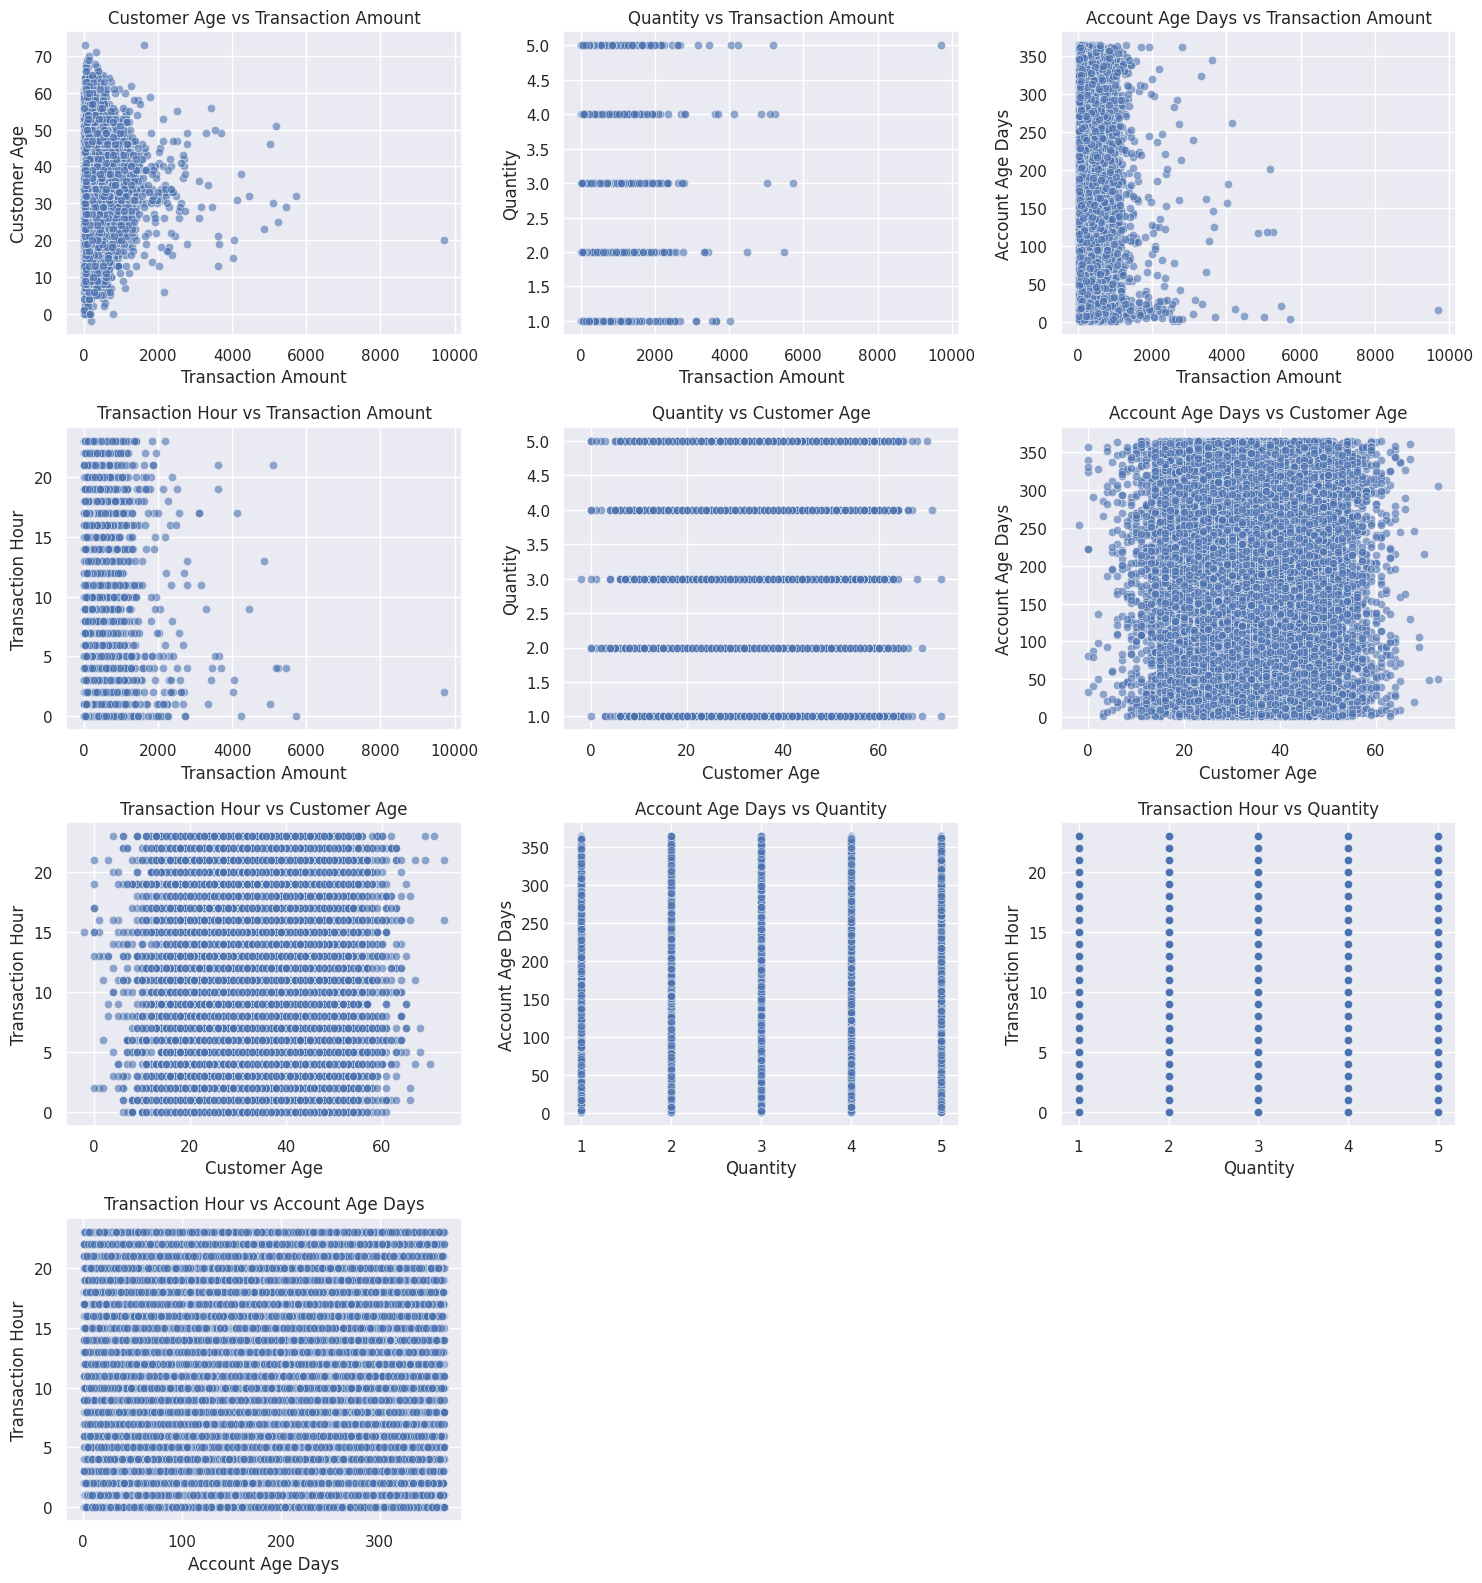

In [ ]:
# Scatter Plot ..

import math
import itertools


numerical_cols = ['Transaction Amount', 'Customer Age', 'Quantity', 'Account Age Days', 'Transaction Hour']

# Generate all unique (non-repeating) feature pairs
feature_pairs = list(itertools.combinations(numerical_cols, 2))

# Grid layout setup
num_cols = 3
num_rows = math.ceil(len(feature_pairs) / num_cols)

# Define subplot size
subplot_width = 5
subplot_height = 4
fig_width = subplot_width * num_cols
fig_height = subplot_height * num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
axes = axes.flatten()

# Plot scatterplots for each feature pair
for i, (x_col, y_col) in enumerate(feature_pairs):
    sns.scatterplot(data=Transaction_Data, x=x_col, y=y_col, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{y_col} vs {x_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

# Hide unused subplots
for j in range(len(feature_pairs), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


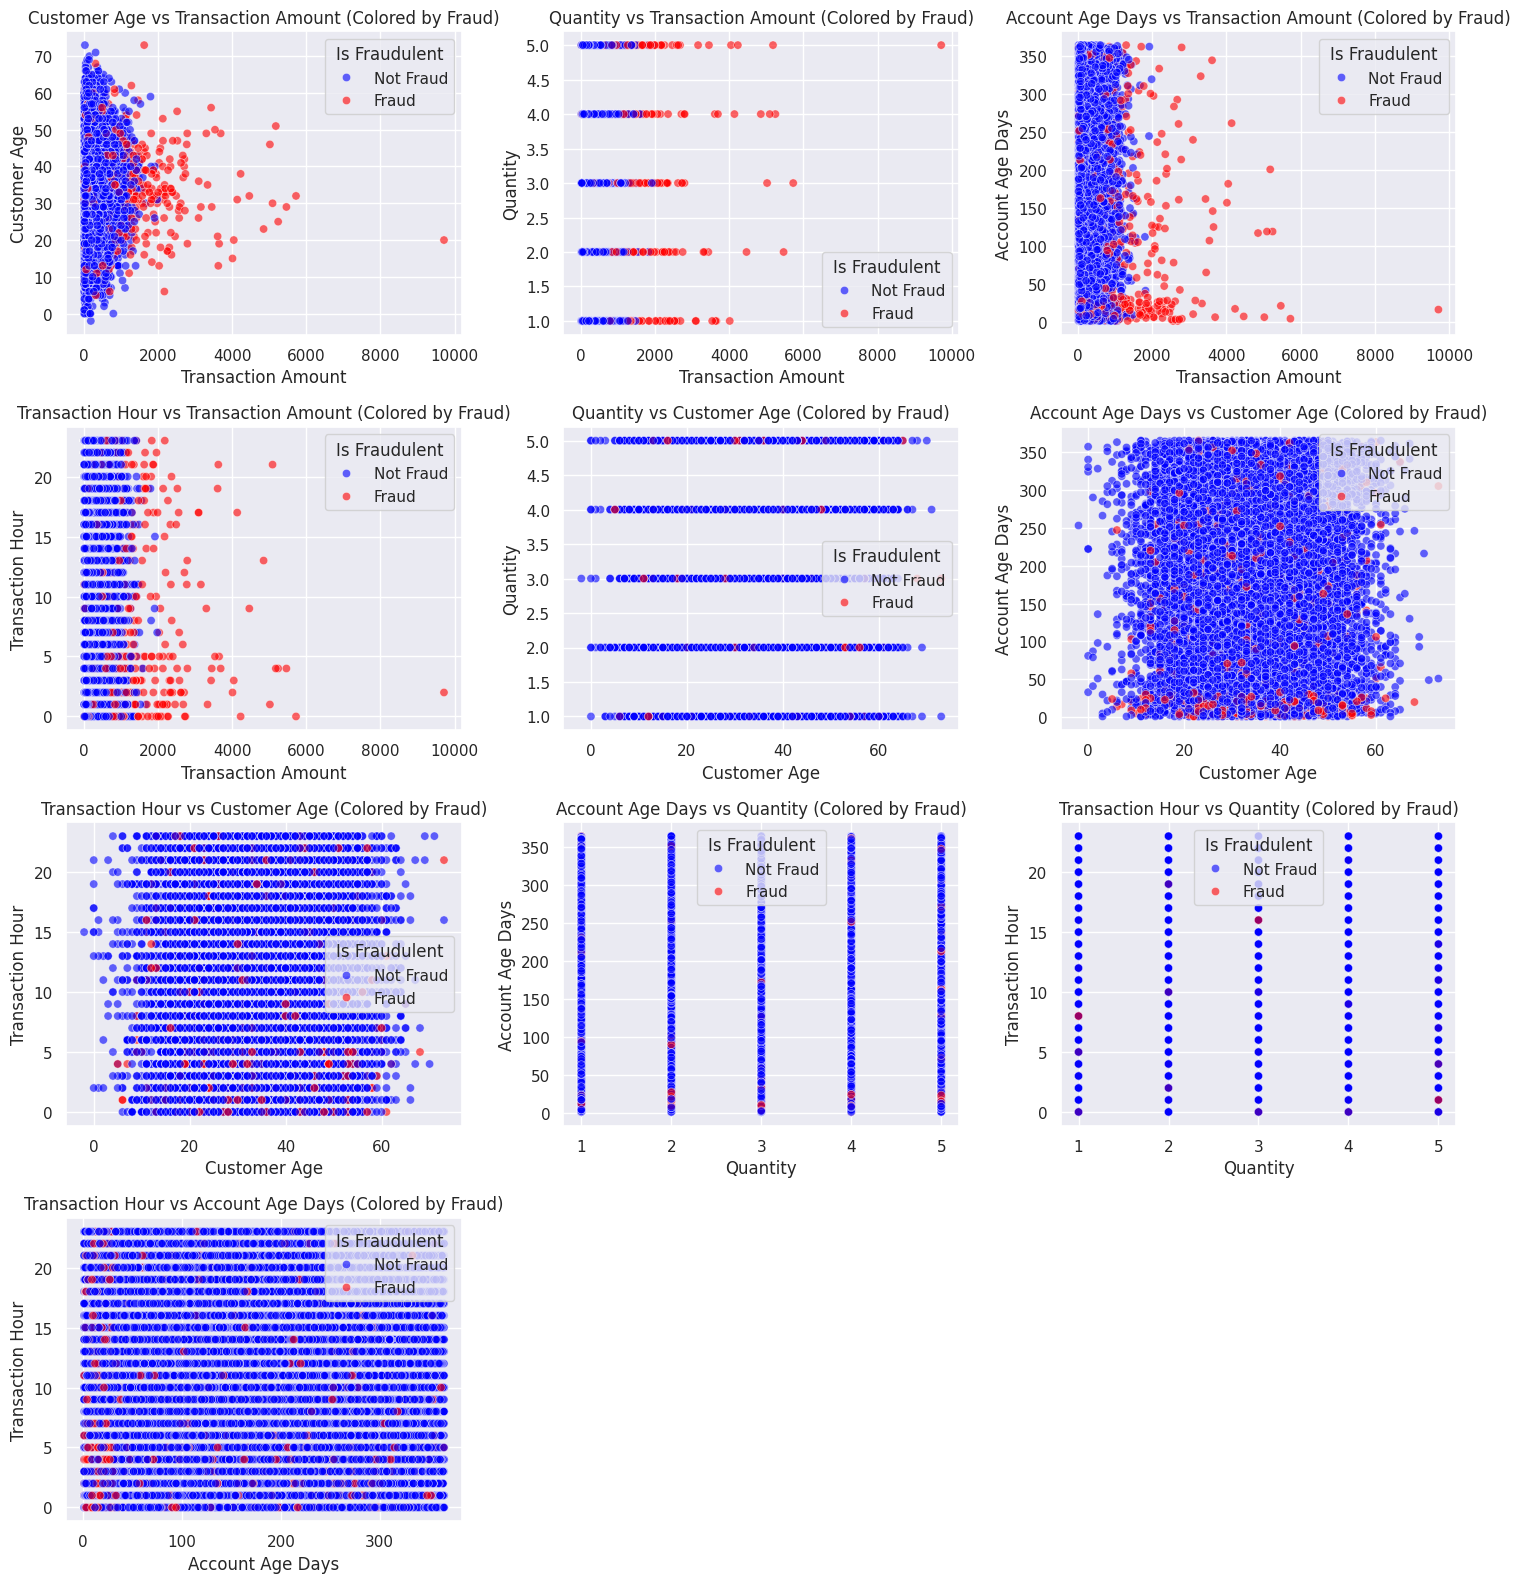

"\nif we only use this line instead of the 2 line code \nplt.legend(title='Is Fraudulent', labels=['Not Fraud', 'Fraud'])\nthen in label box color of the dots not change , i.e. there is only 1 single color is shown ..\n\n"

In [ ]:
import math
import itertools

numerical_cols = ['Transaction Amount', 'Customer Age', 'Quantity', 'Account Age Days', 'Transaction Hour']

# Generate all unique (non-repeating) pairs
feature_pairs = list(itertools.combinations(numerical_cols, 2))

# Grid layout setup
num_cols = 3
num_rows = math.ceil(len(feature_pairs) / num_cols)

# Define subplot size
subplot_width = 5
subplot_height = 4
fig_width = subplot_width * num_cols
fig_height = subplot_height * num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
axes = axes.flatten()

# Plot scatterplots for each feature pair with fraud coloring
for i, (x_col, y_col) in enumerate(feature_pairs):
    scatter = sns.scatterplot(
        data=Transaction_Data,
        x=x_col,
        y=y_col,
        hue='Is Fraudulent',
        palette={0: 'blue', 1: 'red'},
        alpha=0.6,
        ax=axes[i]
    )
    axes[i].set_title(f'{y_col} vs {x_col} (Colored by Fraud)')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

    # Fix legend with correct colors and labels
    handles, labels = scatter.get_legend_handles_labels()
    axes[i].legend(handles=handles, labels=['Not Fraud', 'Fraud'], title='Is Fraudulent')

# Hide unused subplots (if there are any)
for j in range(len(feature_pairs), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to ensure everything fits well
plt.tight_layout()
plt.show()



'''
if we only use this line instead of the 2 line code
plt.legend(title='Is Fraudulent', labels=['Not Fraud', 'Fraud'])
then in label box color of the dots not change , i.e. there is only 1 single color is shown ..

'''

### **Pair Plot ( All at once)**

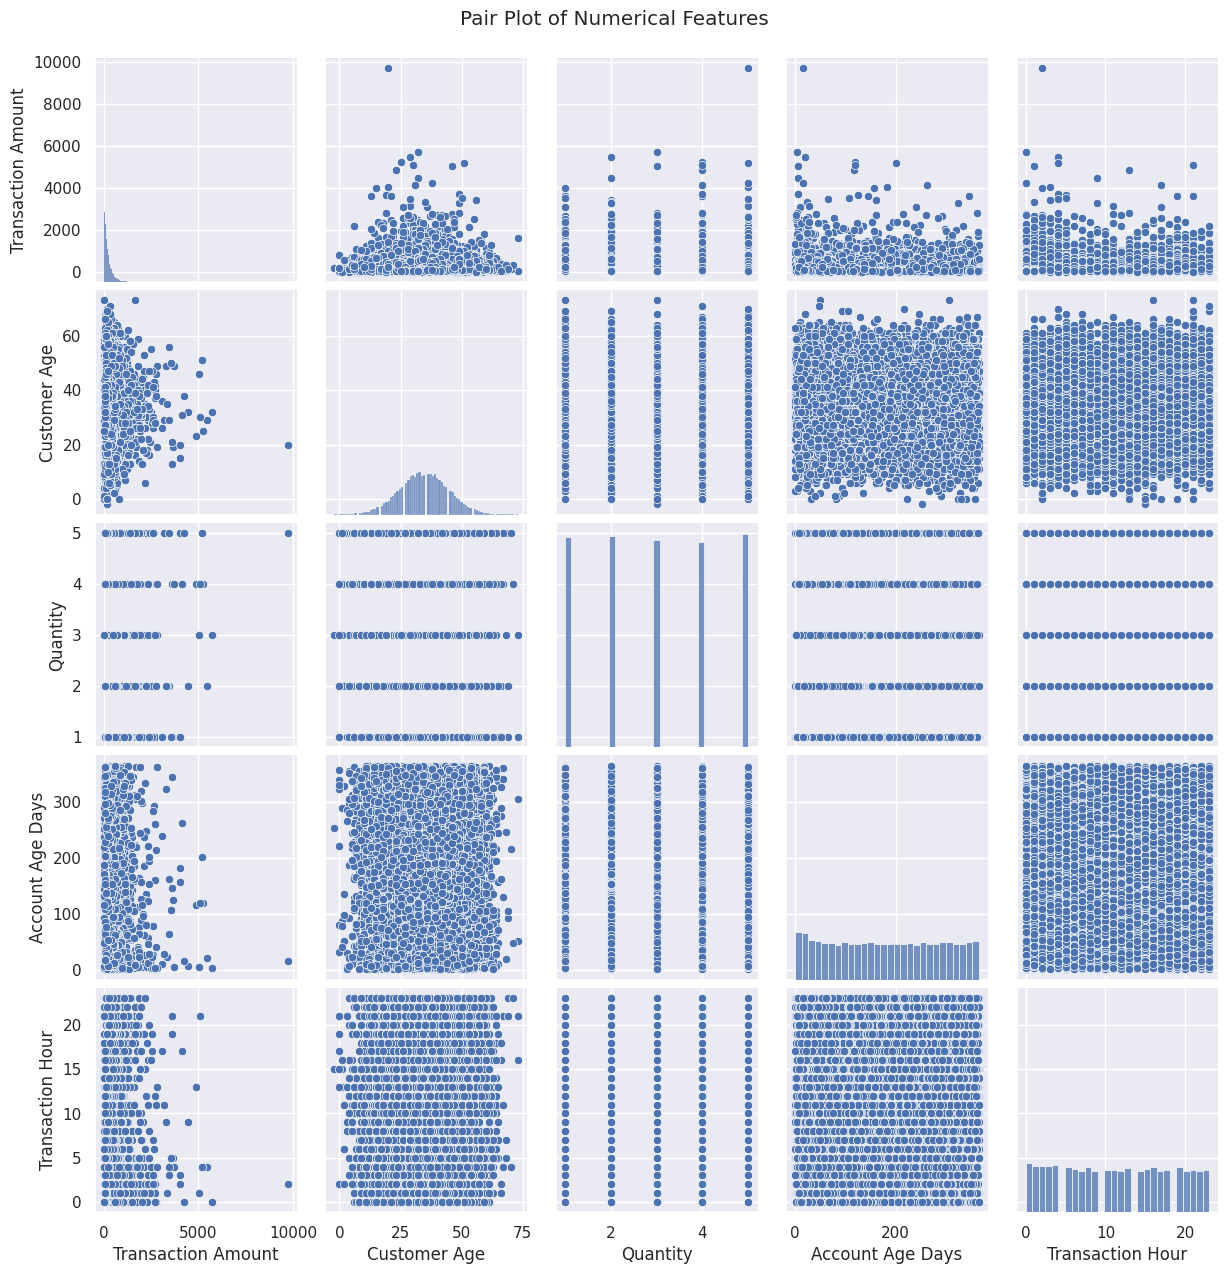

In [ ]:
sns.pairplot(Transaction_Data[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02) # y=1.02 pushes the title slightly above the plot grid so it doesn't overlap.
plt.show()

### **Correlational Matrix**

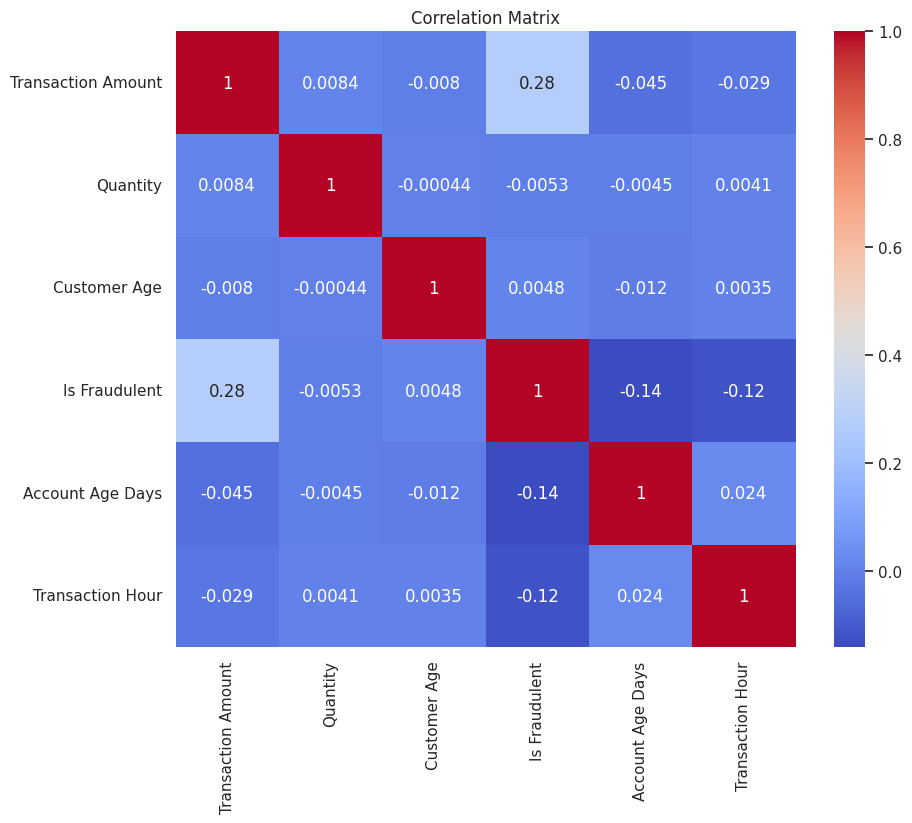

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(Transaction_Data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### **Time Series Analysis (if Date Time columns available)**

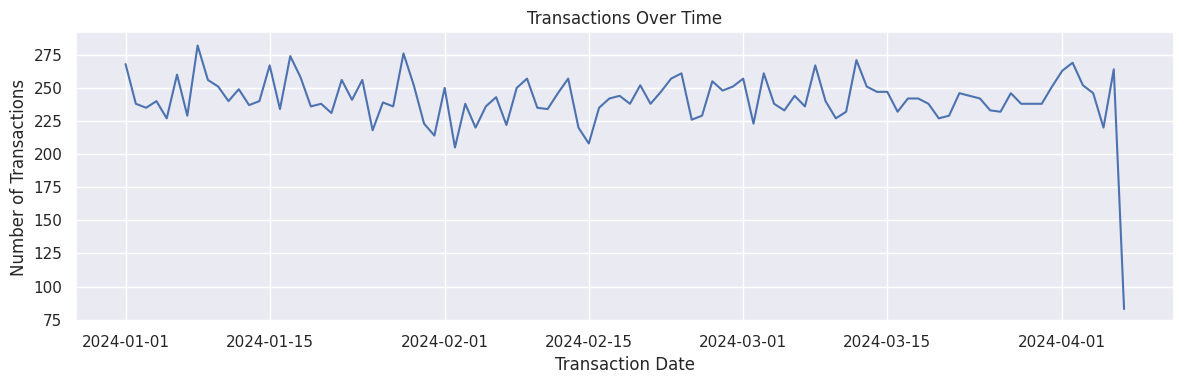

In [ ]:
Transaction_Data['Transaction Date'] = pd.to_datetime(Transaction_Data['Transaction Date'])

# Transaction volume over time
daily_data = Transaction_Data.groupby(Transaction_Data['Transaction Date'].dt.date).size()

plt.figure(figsize=(12, 4))
daily_data.plot()
plt.title("Transactions Over Time")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()


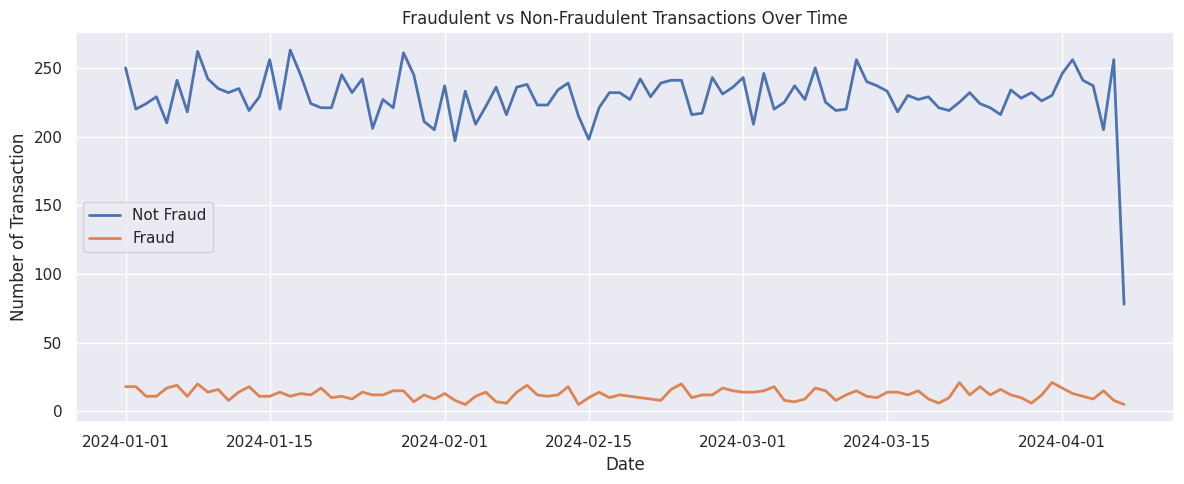

In [ ]:
# Fraudulent vs Non-Fraudulent Transactions Over Time..

fraud_trend = Transaction_Data.groupby([Transaction_Data['Transaction Date'].dt.date, 'Is Fraudulent'])['Transaction ID'].count().unstack()

fraud_trend.plot(figsize=(12, 5), linewidth=2)
plt.title('Fraudulent vs Non-Fraudulent Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transaction')
plt.legend(['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.show()


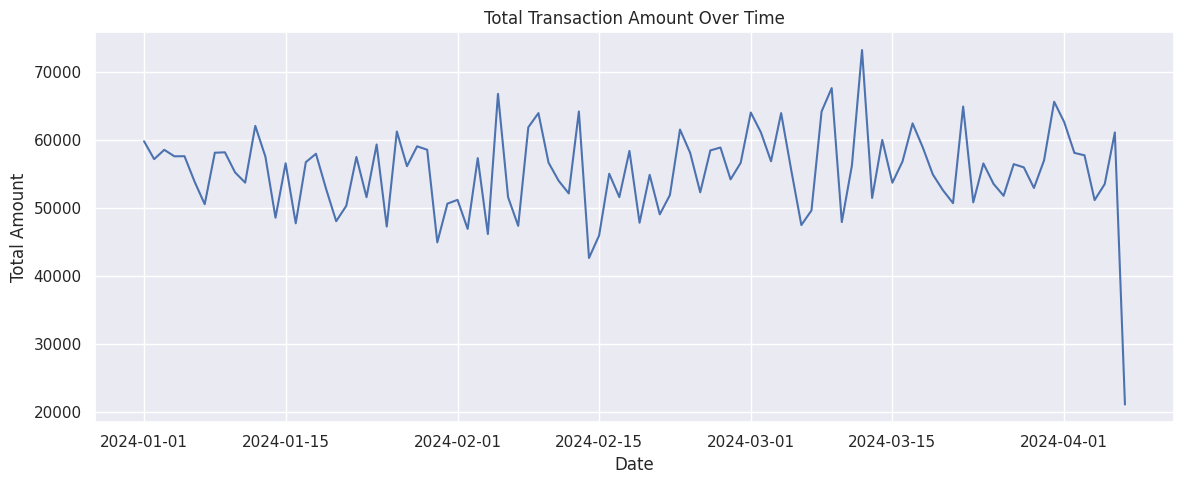

In [ ]:
#  Daily Aggregation of Transaction Amount

Transaction_Data['Transaction Date'] = pd.to_datetime(Transaction_Data['Transaction Date'])

daily_amount = Transaction_Data.groupby(Transaction_Data['Transaction Date'].dt.date)['Transaction Amount'].sum()

plt.figure(figsize=(12, 5))
daily_amount.plot()
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

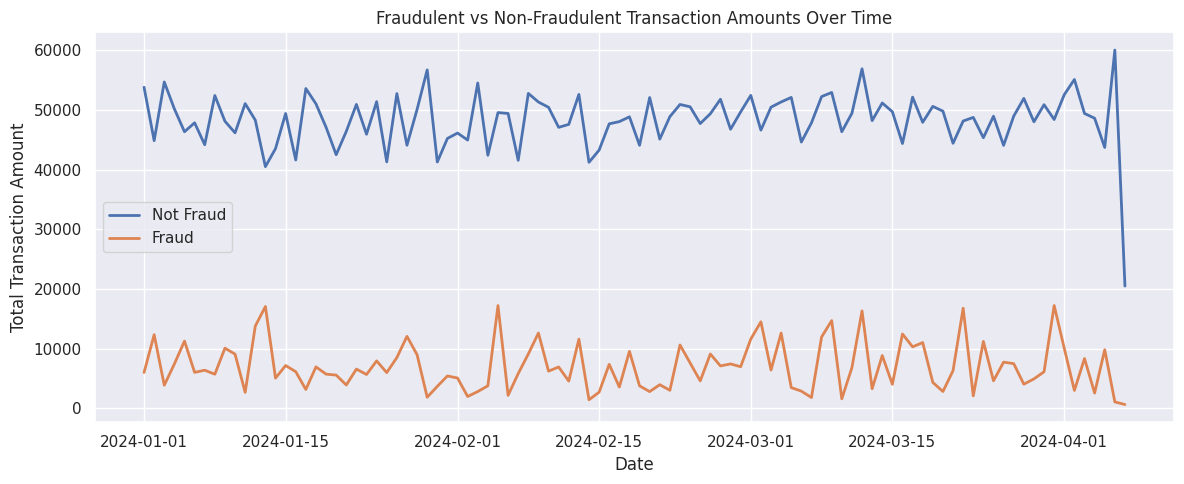

In [ ]:
# Ensure datetime format
Transaction_Data['Transaction Date'] = pd.to_datetime(Transaction_Data['Transaction Date'])

# Group by date and fraud status, then sum the transaction amount
amount_trend = Transaction_Data.groupby([Transaction_Data['Transaction Date'].dt.date, 'Is Fraudulent'])['Transaction Amount'].sum().unstack()

# Plot
amount_trend.plot(figsize=(12, 5), linewidth=2)
plt.title('Fraudulent vs Non-Fraudulent Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.legend(['Not Fraud', 'Fraud'])  # Assumes 0 = Not Fraud, 1 = Fraud
plt.tight_layout()
plt.show()


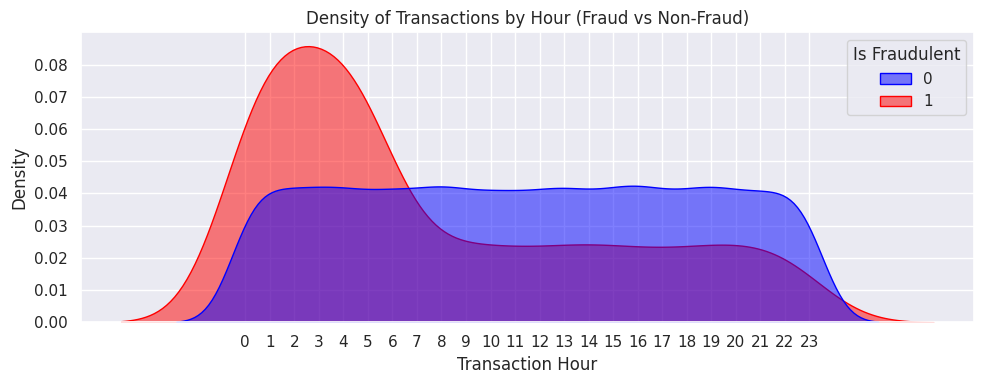

In [ ]:
# Hourly Pattern using Transaction Hour ..
plt.figure(figsize=(10, 4))
sns.kdeplot(data=Transaction_Data, x='Transaction Hour', hue='Is Fraudulent', fill=True, common_norm=False, palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('Density of Transactions by Hour (Fraud vs Non-Fraud)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


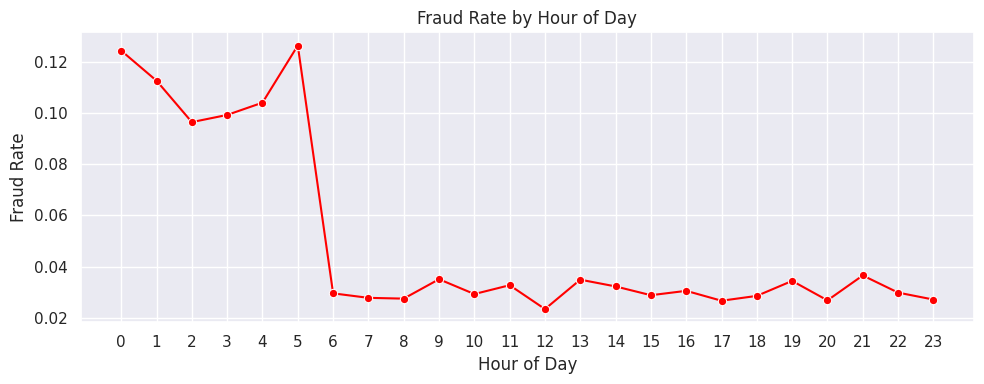

In [ ]:
# Line Plot of Fraud Rate By Hour ..
fraud_by_hour = Transaction_Data.groupby('Transaction Hour')['Is Fraudulent'].mean()

plt.figure(figsize=(10, 4))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o', color='red')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Spikes in fraud rate at specific hours may indicate bot activity, late-night abuse, or off-hours fraud ..

### **Day Of week Pattern**

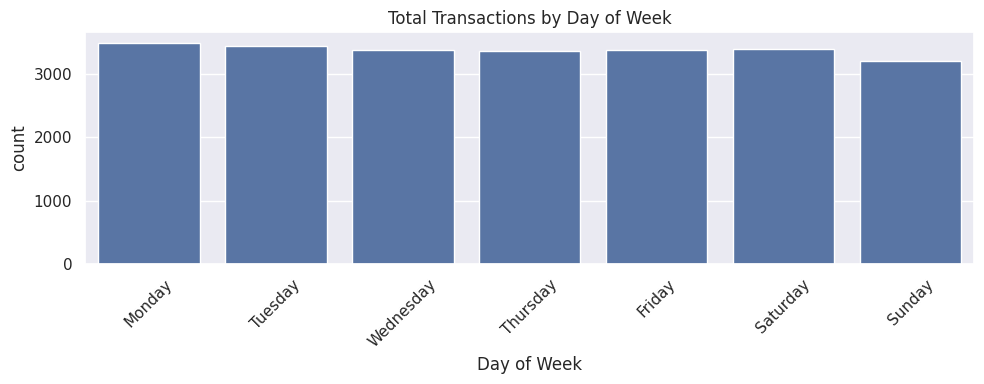

In [ ]:
Transaction_Data['Day of Week'] = Transaction_Data['Transaction Date'].dt.day_name()

# Transaction Count By day of week ..
plt.figure(figsize=(10, 4))
sns.countplot(data=Transaction_Data, x='Day of Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Total Transactions by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


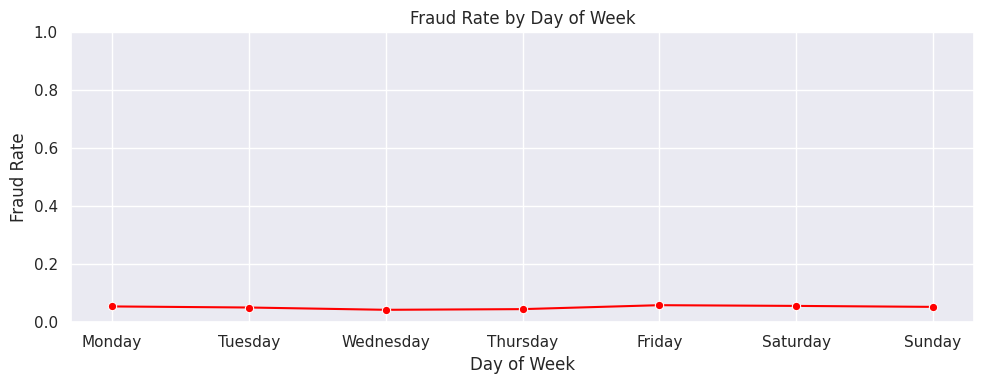

In [ ]:
# Fraud Rate By day of week ..

fraud_day = Transaction_Data.groupby('Day of Week')['Is Fraudulent'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 4))
sns.lineplot(x=fraud_day.index, y=fraud_day.values, marker='o', color='red')
plt.title('Fraud Rate by Day of Week')
plt.ylabel('Fraud Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


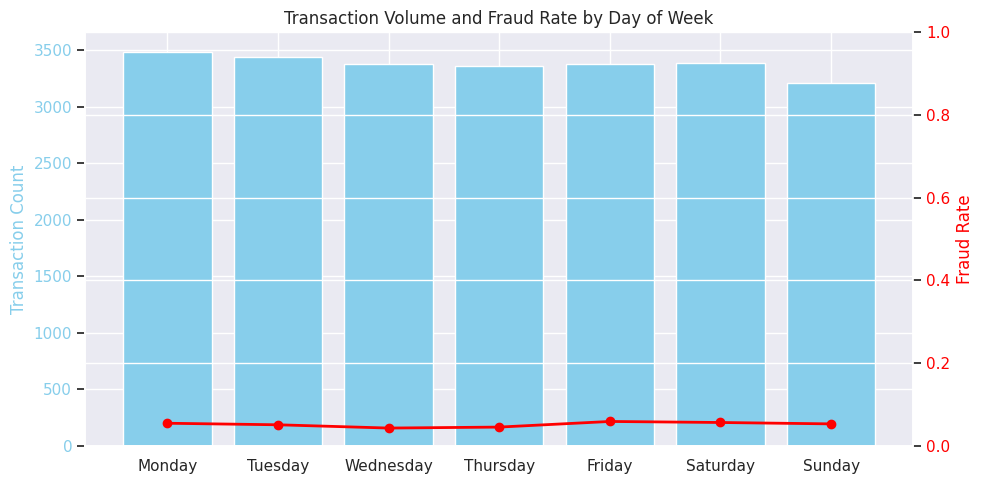

In [ ]:
# Combined Plot: Transaction Volume & Fraud Rate by Day of Week ..

# Ensure the day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Transaction counts
day_counts = Transaction_Data['Day of Week'].value_counts().reindex(day_order)

# Fraud rate
fraud_rate = Transaction_Data.groupby('Day of Week')['Is Fraudulent'].mean().reindex(day_order)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot (transaction count)
color1 = 'skyblue'
ax1.bar(day_counts.index, day_counts.values, color=color1)
ax1.set_ylabel('Transaction Count', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Line plot (fraud rate)
ax2 = ax1.twinx()
color2 = 'red'
ax2.plot(fraud_rate.index, fraud_rate.values, color=color2, marker='o', linewidth=2)
ax2.set_ylabel('Fraud Rate', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1)

# Title and layout
plt.title('Transaction Volume and Fraud Rate by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


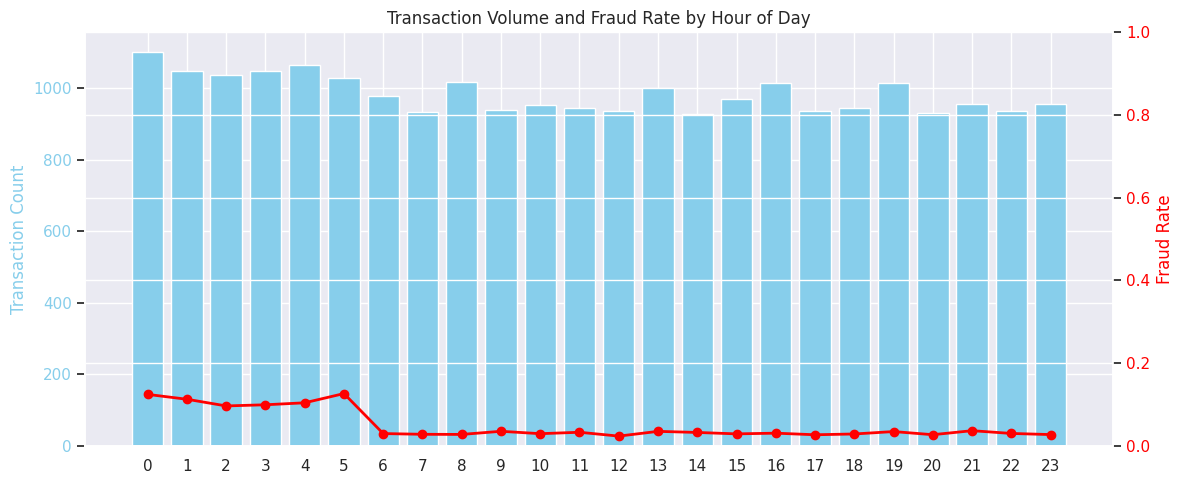

In [ ]:
# Combined Plot: Transaction Volume & Fraud Rate by Hour ..


# Count of transactions by hour
hourly_counts = Transaction_Data['Transaction Hour'].value_counts().sort_index()

# Fraud rate by hour
hourly_fraud_rate = Transaction_Data.groupby('Transaction Hour')['Is Fraudulent'].mean()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Bar plot - transaction count
color1 = 'skyblue'
ax1.bar(hourly_counts.index, hourly_counts.values, color=color1)
ax1.set_ylabel('Transaction Count', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Line plot - fraud rate
ax2 = ax1.twinx()
color2 = 'red'
ax2.plot(hourly_fraud_rate.index, hourly_fraud_rate.values, color=color2, marker='o', linewidth=2)
ax2.set_ylabel('Fraud Rate', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1)

# Title and ticks
plt.title('Transaction Volume and Fraud Rate by Hour of Day')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


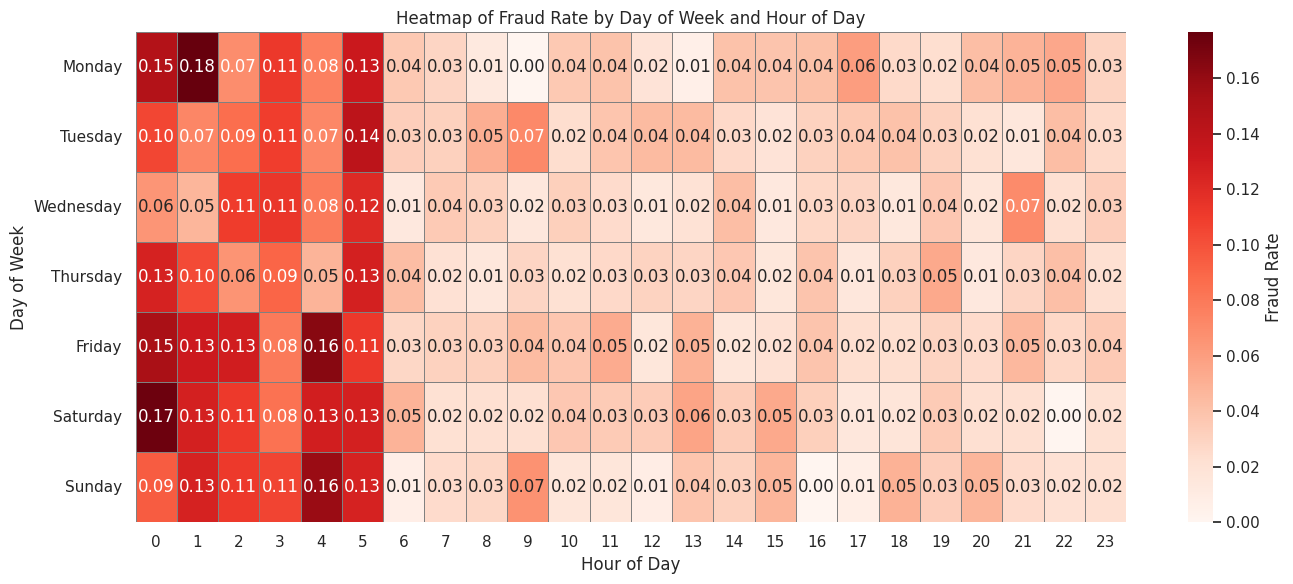

In [ ]:
# Heatmap: Fraud Rate by Day of Week and Hour of Day ...

# First, ensure day and hour columns are correct
Transaction_Data['Day of Week'] = Transaction_Data['Transaction Date'].dt.day_name()
Transaction_Data['Transaction Hour'] = Transaction_Data['Transaction Hour'].astype(int)

# Pivot table: mean fraud rate for each (day, hour) pair
fraud_heatmap = Transaction_Data.pivot_table(
    values='Is Fraudulent',
    index='Day of Week',
    columns='Transaction Hour',
    aggfunc='mean'
).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(fraud_heatmap, cmap='Reds', linewidths=0.5, linecolor='gray', annot=True, fmt=".2f", cbar_kws={'label': 'Fraud Rate'})
plt.title('Heatmap of Fraud Rate by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


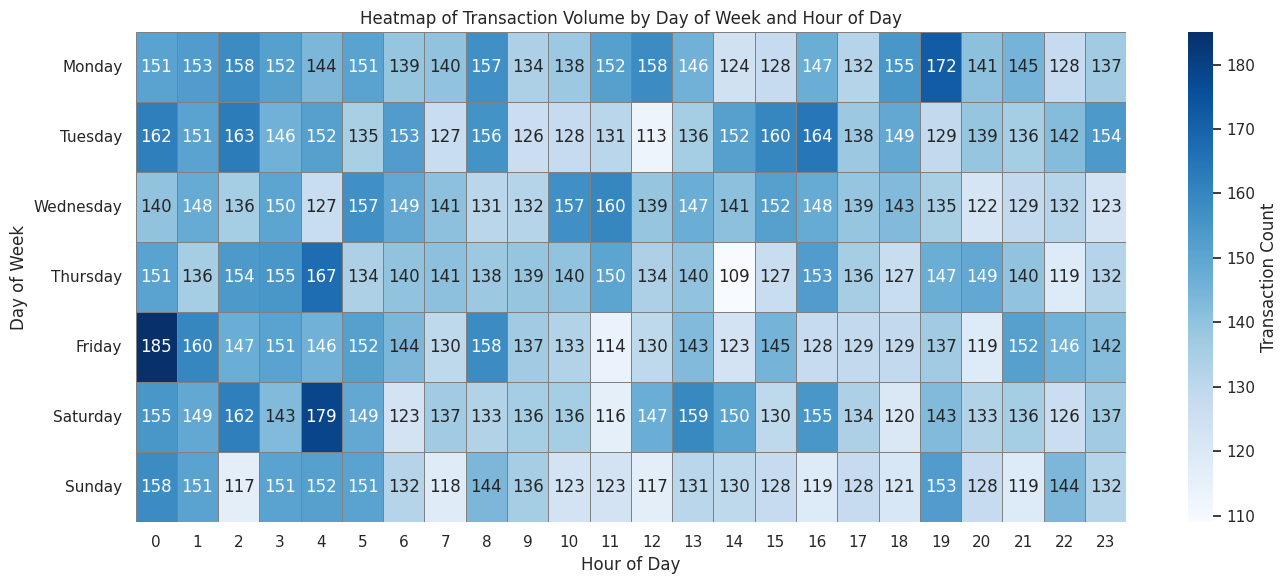

In [ ]:
# Heatmap: Transaction Volume by Day of Week and Hour of Day ..


# Create pivot table of transaction counts by day and hour
volume_heatmap = Transaction_Data.pivot_table(
    values='Transaction ID',
    index='Day of Week',
    columns='Transaction Hour',
    aggfunc='count'
).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(volume_heatmap, cmap='Blues', linewidths=0.5, linecolor='gray', annot=True, fmt='d', cbar_kws={'label': 'Transaction Count'})
plt.title('Heatmap of Transaction Volume by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


## **Multivariate Analysis**

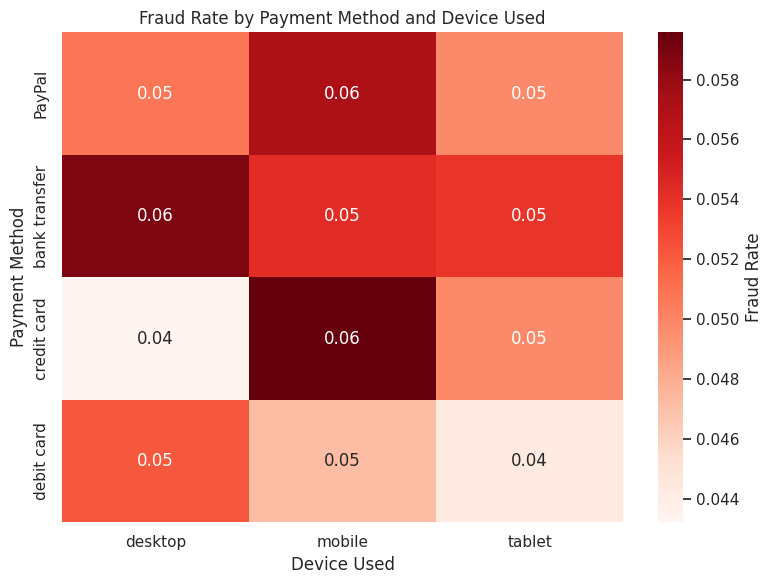

In [ ]:
# Cross-tabulation: Payment Method × Device Used × Is Fraudulent
# We’ll calculate the fraud rate (mean of Is Fraudulent) across combinations of Payment Method and Device Used.

# Pivot table of fraud rate
crosstab = Transaction_Data.pivot_table(
    index='Payment Method',
    columns='Device Used',
    values='Is Fraudulent',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap='Reds', cbar_kws={'label': 'Fraud Rate'})
plt.title('Fraud Rate by Payment Method and Device Used')
plt.tight_layout()
plt.show()



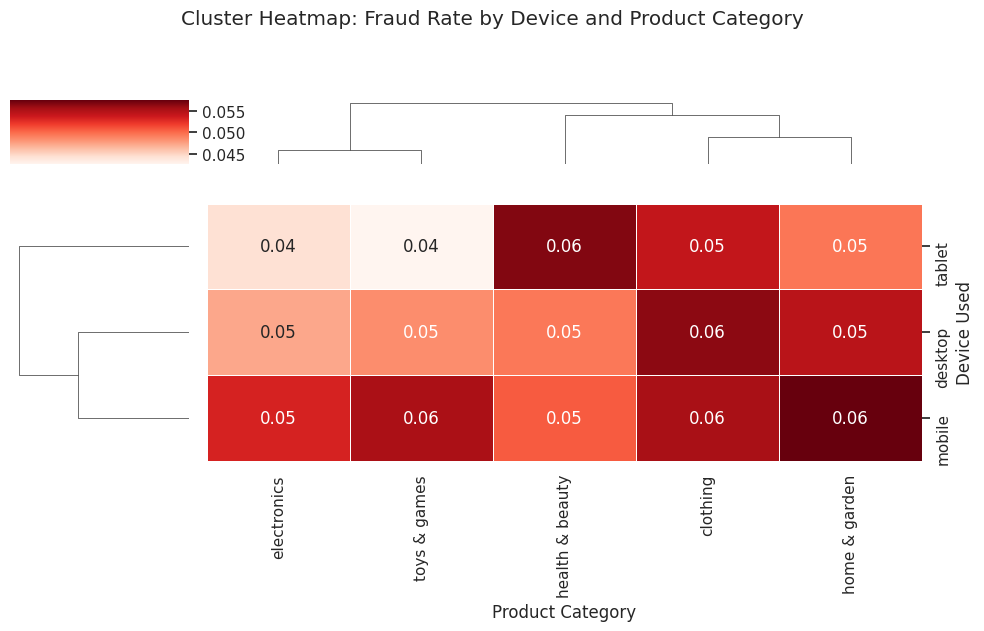

In [ ]:
# Cluster Heatmap: Device Used × Product Category (Fraud Rate) .
# Useful to find device–product pairs that are fraud-prone.

cluster_data = Transaction_Data.pivot_table(
    index='Device Used',
    columns='Product Category',
    values='Is Fraudulent',
    aggfunc='mean'
)

sns.clustermap(cluster_data, cmap='Reds', annot=True, fmt=".2f", figsize=(10, 6), linewidths=0.5)
plt.suptitle('Cluster Heatmap: Fraud Rate by Device and Product Category', y=1.05)
plt.tight_layout()
plt.show()



### **PCA or t-SNE: High-Level Fraud Pattern Detection**

In [ ]:
# Preprocess the data ..
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Select numeric features
numerical_cols = ['Transaction Amount', 'Customer Age', 'Quantity', 'Account Age Days', 'Transaction Hour']
X = Transaction_Data[numerical_cols]
y = Transaction_Data['Is Fraudulent']

# Normalize features
X_scaled = StandardScaler().fit_transform(X)

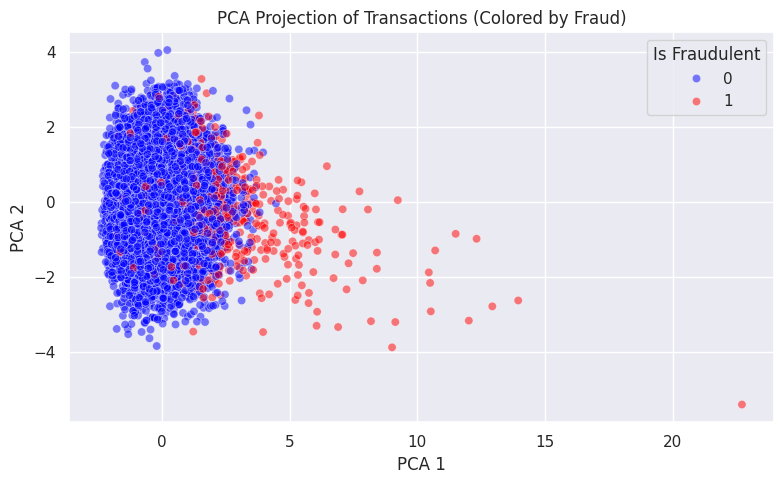

In [ ]:
# PCA ( fast and Linear)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('PCA Projection of Transactions (Colored by Fraud)')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


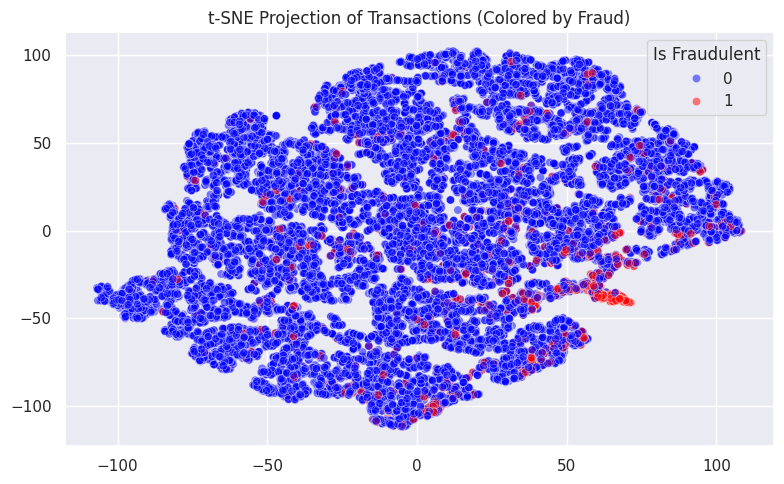

In [ ]:
# t-SNE (slower, nonlinear, better for local structure)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('t-SNE Projection of Transactions (Colored by Fraud)')
plt.tight_layout()
plt.show()


<ipython-input-100-bab4aab04d81>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample[numerical_cols] = StandardScaler().fit_transform(sample[numerical_cols])


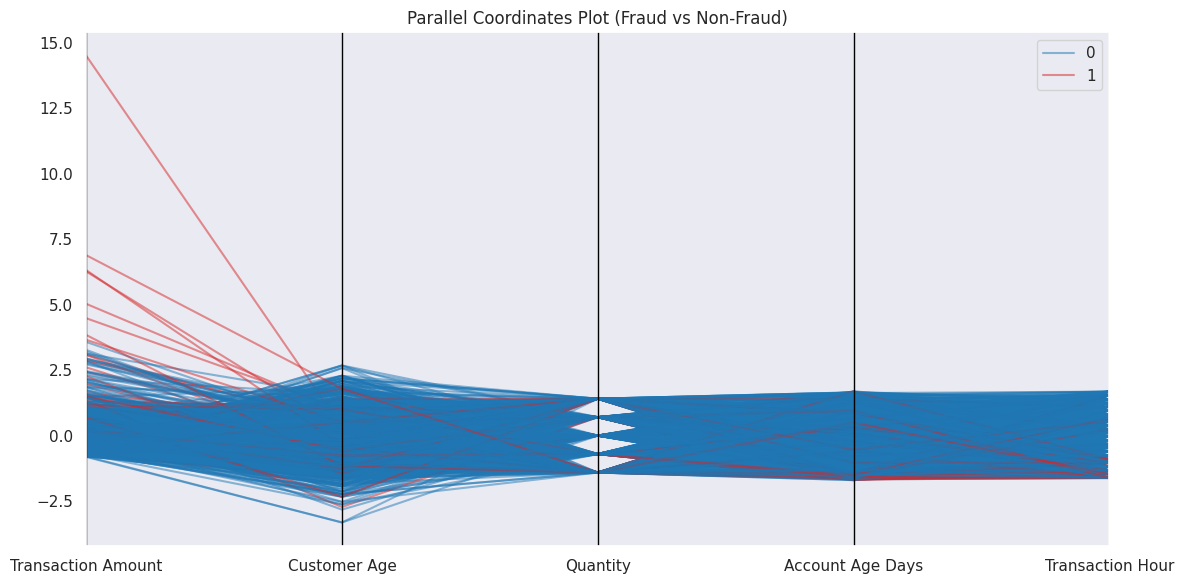

In [ ]:
# Parallel Coordinates Plot
# Helpful to visualize how fraudulent vs. normal transactions differ across several numeric features.

from pandas.plotting import parallel_coordinates

# Sample to avoid clutter
sampled_data = Transaction_Data.sample(1000, random_state=1)

# Include a binary target and scale features
sample = sampled_data[numerical_cols + ['Is Fraudulent']]
sample[numerical_cols] = StandardScaler().fit_transform(sample[numerical_cols])

plt.figure(figsize=(12, 6))
parallel_coordinates(sample, class_column='Is Fraudulent', color=('#1f77b4', '#d62728'), alpha=0.5)
plt.title('Parallel Coordinates Plot (Fraud vs Non-Fraud)')
plt.tight_layout()
plt.show()


In [ ]:
'''
📁 EDA Report Structure

Introduction
  Dataset overview
  Shape, column types

Univariate Analysis
  Categorical: count plots + pie charts
  Numerical: histograms + boxplots + outlier counts

Bivariate Analysis
  Numerical vs Numerical: scatter + pair plot
  Categorical vs Target: fraud rate bar plots
  Numerical vs Target: box/violin plots

Time-Based Analysis
  Trend over time
  Hourly + day-of-week fraud patterns
  Heatmaps: fraud rate & volume

Multivariate Analysis
  Cross-tab & cluster heatmaps
  PCA & t-SNE projections
  Parallel coordinates

'''

In [ ]:
# distribution of legit transactions & fraudulent transactions
Transaction_Data['Is Fraudulent'].value_counts()

Is Fraudulent
0    22412
1     1222
Name: count, dtype: int64

### **(1 for fraudulent, 0 for legitimate)**

### **This data is highly imbalanced , so we have to make it balanced before Model Training**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# loading the dataset to a Pandas DataFrame
Transaction_Data = pd.read_csv('Transaction_Data.csv')

### **Feature Engineering**

In [ ]:


Transaction_Data['Log_Amount'] = np.log1p(Transaction_Data['Transaction Amount'])

# Cyclical Encoding of Hour
Transaction_Data['Hour_sin'] = np.sin(2 * np.pi * Transaction_Data['Transaction Hour'] / 24)
Transaction_Data['Hour_cos'] = np.cos(2 * np.pi * Transaction_Data['Transaction Hour'] / 24)

# Per-customer stats
customer_stats = Transaction_Data.groupby('Customer ID').agg({
    'Transaction ID': 'count',
    'Transaction Amount': 'mean',
    'Quantity': 'mean'
}).rename(columns={
    'Transaction ID': 'Customer_Total_Transactions',
    'Transaction Amount': 'Customer_Avg_Transaction_Amount',
    'Quantity': 'Customer_Avg_Quantity'
})
Transaction_Data = Transaction_Data.merge(customer_stats, on='Customer ID', how='left')
Transaction_Data['Deviation_From_Customer_Avg'] = (
    Transaction_Data['Transaction Amount'] - Transaction_Data['Customer_Avg_Transaction_Amount']
)

# High-value flag
amount_95 = Transaction_Data['Transaction Amount'].quantile(0.95)
Transaction_Data['Is_High_Value'] = (Transaction_Data['Transaction Amount'] > amount_95).astype(int)

# Z-score of transaction amount
std_per_customer = Transaction_Data.groupby('Customer ID')['Transaction Amount'].transform('std').fillna(1)
Transaction_Data['Amount_Z_Score'] = Transaction_Data['Deviation_From_Customer_Avg'] / std_per_customer

# Time-based flags
Transaction_Data['Transaction Date'] = pd.to_datetime(Transaction_Data['Transaction Date'])
Transaction_Data['Is_Night_Transaction'] = Transaction_Data['Transaction Hour'].apply(lambda x: 1 if x < 6 else 0)
Transaction_Data['Is_Weekend_Transaction'] = Transaction_Data['Transaction Date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
Transaction_Data['Days_Since_Account_Creation'] = (
    pd.Timestamp.today().normalize() -
    (Transaction_Data['Transaction Date'] - pd.to_timedelta(Transaction_Data['Account Age Days'], unit='d'))
).dt.days

# Address mismatch
Transaction_Data['Billing_Shipping_Mismatch'] = (
    Transaction_Data['Billing Address'] != Transaction_Data['Shipping Address']
).astype(int)

# Fraud rate by device type
device_fraud_rate = Transaction_Data.groupby('Device Used')['Is Fraudulent'].mean().to_dict()
Transaction_Data['Device_Fraud_Rate'] = Transaction_Data['Device Used'].map(device_fraud_rate)



In [ ]:
# Preview engineered features
Transaction_Data[[
    'Log_Amount', 'Hour_sin', 'Hour_cos',
    'Customer_Total_Transactions', 'Customer_Avg_Transaction_Amount',
    'Deviation_From_Customer_Avg', 'Is_High_Value', 'Amount_Z_Score',
    'Is_Night_Transaction', 'Is_Weekend_Transaction',
    'Days_Since_Account_Creation', 'Billing_Shipping_Mismatch',
    'Device_Fraud_Rate'
]].head()

Log_Amount  Hour_sin  Hour_cos  Customer_Total_Transactions  \
0    3.768614 -0.258819  0.965926                            1   
1    5.711552  0.000000  1.000000                            1   
2    5.832820  0.866025 -0.500000                            1   
3    4.572337 -0.866025  0.500000                            1   
4    4.362461 -0.707107 -0.707107                            1   

   Customer_Avg_Transaction_Amount  Deviation_From_Customer_Avg  \
0                            42.32                          0.0   
1                           301.34                          0.0   
2                           340.32                          0.0   
3                            95.77                          0.0   
4                            77.45                          0.0   

   Is_High_Value  Amount_Z_Score  Is_Night_Transaction  \
0              0             0.0                     0   
1              0             0.0                     1   
2              0             0.0                     0   
3              0             0.0                     0   
4              0             0.0                     0   

   Is_Weekend_Transaction  Days_Since_Account_Creation  \
0                       1                          689   
1                       0                          692   
2                       0                          829   
3                       0                          800   
4                       0                          591   

   Billing_Shipping_Mismatch  Device_Fraud_Rate  
0                          0           0.051243  
1                          0           0.049425  
2                          1           0.051243  
3                          0           0.054435  
4                          0           0.051243

In [ ]:
Transaction_Data.shape

(23634, 30)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
target = 'Is Fraudulent'

# Drop irrelevant columns for modeling
X = Transaction_Data.drop(columns=[
    'Transaction ID', 'Customer ID', 'IP Address', 'Transaction Date',
    'Shipping Address', 'Billing Address', target
])
y = Transaction_Data[target]

# Identify numerical and categorical features
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --------------------------
# Step 2: Feature Selection
# --------------------------
# Temporarily encode categorical variables using one-hot for feature selection
X_encoded = pd.get_dummies(X, drop_first=True)

# Select top 10 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_selected_array = selector.fit_transform(X_encoded, y)
selected_feature_names = X_encoded.columns[selector.get_support()].tolist()

print("Top 10 Selected Features:")
for i, feat in enumerate(selected_feature_names, 1):
    print(f"{i}. {feat}")

# Keep only selected features
X = X_encoded[selected_feature_names]


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 8 11 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Top 10 Selected Features:
1. Transaction Amount
2. Account Age Days
3. Transaction Hour
4. Log_Amount
5. Hour_sin
6. Hour_cos
7. Customer_Avg_Transaction_Amount
8. Is_High_Value
9. Is_Night_Transaction
10. Days_Since_Account_Creation


In [ ]:

# --------------------------
# Step 3: Train-Test Split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --------------------------
# Step 4: Pipeline with SMOTE
# --------------------------
# Since all features are now numeric, no categorical transformation needed
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# --------------------------
# Step 5: Train and Evaluate
# --------------------------
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[4226  257]
 [ 166   78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      4483
           1       0.23      0.32      0.27       244

    accuracy                           0.91      4727
   macro avg       0.60      0.63      0.61      4727
weighted avg       0.92      0.91      0.92      4727


ROC-AUC Score: 0.7690505662557641


 **XGBoost Model with SMOTE & Threshold Tuning**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Use top 10 selected features (X, y already defined from previous step)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# XGBoost + SMOTE Pipeline
xgb_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Fit the pipeline
xgb_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:15:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:

# Predict probabilities
y_prob = xgb_pipeline.predict_proba(X_test)[:, 1]

# Find optimal threshold based on F1 score
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_threshold = thresholds[np.argmax(f1_scores)]

# Make final predictions
y_pred_custom = (y_prob >= best_threshold).astype(int)

# Evaluation
print("Best Threshold:", best_threshold)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))


Best Threshold: 0.70722884

Confusion Matrix:
 [[4380  103]
 [ 174   70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4483
           1       0.40      0.29      0.34       244

    accuracy                           0.94      4727
   macro avg       0.68      0.63      0.65      4727
weighted avg       0.93      0.94      0.94      4727


ROC-AUC Score: 0.7647076569773608


**Precision-Recall Curve with Threshold Labels**

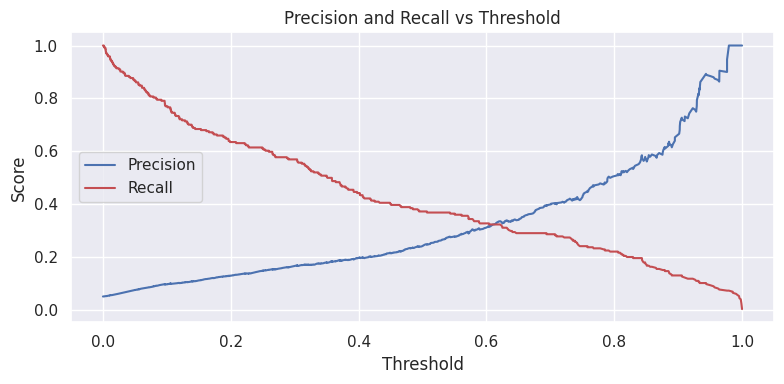

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming y_test and y_prob are already defined
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the curve
plt.figure(figsize=(8,4))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='r')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision line: How often your fraud predictions are actually correct.
# Recall line: How many actual frauds you’re successfully catching.
# Choose a threshold based on where you see the best trade-off depending on your business risk tolerance.

**F1-Score vs Threshold Curve**

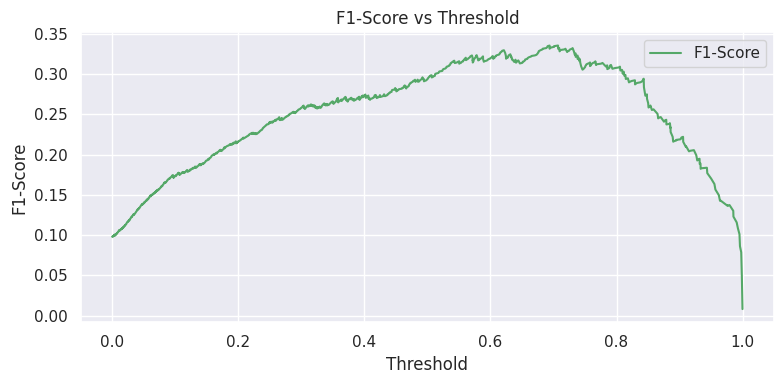

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming y_test and y_prob are already defined
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate F1-scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# Plot the curve
plt.figure(figsize=(8,4))
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', color='g')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# The F1-score balances precision and recall, so it’s a good metric when both false positives and false negatives matter.

**ROC Curve**

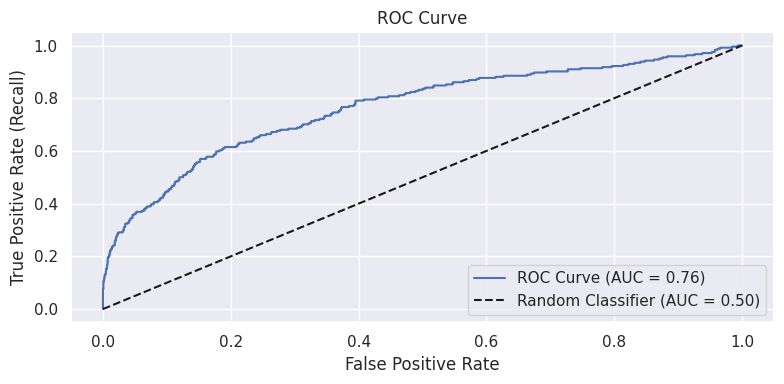

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# The ROC curve shows the true positive rate (recall) vs. the false positive rate.
#  The area under this curve (AUC) indicates how well the model distinguishes between classes.

In [ ]:
# This is method 2 ...

'''
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Modeling pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train model
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

'''